# Checklist de base
### Analyse:
- **Target** : % / crédit / ratio ?? ---> aucune information
- **Shape** :(25053, 121)
- **Type de variable** : 119 Quantitaves, 2 Qualit (CTR_CATEGO_X, id) 
-------
### valeurs NAN : 

- **CTR** : 0  +  0,000399  NAN 
- **TVA** : 0,07  NAN / colonnes > 90% ==0 ((TVA_CHAFF7 TVA_CHAF10 TVA_CAF125 TVA_CHAF15    TVA_CHAF29 TVA_CHAF36 TVA_MOIDEB  TVA_BASIMB TVA_DEDIMB  TVA_RSNRES TVA_TRSPOR TVA_MOIFIN TVA_ACHSUS  TVA_ACHEXO  TVA_ACHNDD TVA_AACHAB TVA_CRDBLQ TVA_CRDRES TVA_CRDRMP TVA_CRDREP TVA_MTVLSM TVA_TXVLSM TVA_MTALSM TVA_TXALSM TVA_MTORDTVA TVA_MTDJRTVA TVA_MTORDTAX TVA_MTDJRTAX TVA_MTRESTAX TVA_CA072018 TVA_CA132018 TVA_CA192018 ))
- **AX** : 0,24  NAN  (5)
-----
- **ADB** : 0,74  NAN  (1)
- **SND_I** : 0,82  NAN  (7)
- **SND_A**: 0,86  NAN  (7)
-------
- **FAC / SND_E** > 0,90 NAN  (15)
-------
    
- **Visualisation de la Target** :
- **Signification des variables** :
- **Relation Variables/ Target** : SND_I/SND_A


# Démarche projet:
### Definir la problématique:
- **Target** : on n'a pas des explications sur la 'target', peu d'information sur 'target'
- **type target** :(float64)
- **Objectif** : Détecter des fraudeurs dans un jeu de données 
-------
### Traduction en besoin ML : 
-**Régression Lineaire** :
suivre le  comportement  du contribuable qui commence en 2013 par 0 et il progresse au fil des années

-----
### Planning : 

- **Lundi**  
- Définir la problématique  / traduction en besoin ML  / Planning mettre tout ça sur un support
- Objectif : Comprendre au maximum les données pour définir une stratégie
- identification de la target / Visualisation de la target / Visualisation des relation target features
--------
- **Mardi Mercredi**  Pre-processing
- Nettoyage de données  / encoding  / traitement des valeurs NAN
- features selection / features engineering 
--------
- **Jeudi vendredi** : Modeling
- Définir une fonction d'évaluation / entrainement de différents modèles
- Déploiement de notre modèle

In [840]:
# importer les packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [841]:
# afficher toutes les collones df_train
pd.set_option('display.max_column', 121)
# afficher toutes les lignes df_disc 'discription des variables'
pd.set_option('display.max_row', 190)

In [842]:
# afficher df_train
df_train = pd.read_csv('train(1).csv')
df_train


,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,52600000.0,0.0,0.0,6.125000e+05,0.0,0.0,0.0,6422250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.000000e+00,2013,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,12000000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,720000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.000000e+00,2013,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,31926026.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,3831117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,0.0,0.0,31150.0,12.0,192751.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.0,45425.0,0.0,0.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1680387.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,10999653.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1319958.0,1.0,0.0,0.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [843]:
df_train.describe()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.00000,25053.00000,25053.000000,25043.000000,25043.000000,25043.000000,25043.000000,25043.000000,25043.000000,25053.000000,25043.000000,25043.000000,25043.000000,25053.000000,25053.000000,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.0,2.307900e+04,2.307900e+04,2.307900e+04,23079.000000,23079.0,2.307900e+04,23079.000000,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.000000,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.0,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.0,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,6.311000e+03,4.372000e+03,4.372000e+03,4.372000e+03,4372.0,4.372000e+03,4.372000e+03,4.372000e+03,1.443000e+03,1443.0,1443.0,1443.0,1.443000e+03,1.443000e+03,1443.0,3.422000e+03,3.422000e+03,3.422000e+03,3422.0,3.422000e+03,3.422000e+03,3.422000e+03,1.901000e+04,1.901000e+04,1.901000e+04,1.901000e+04,1.901000e+04,25053.000000,25053.000000,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.474000e+03,2.474000e+03,2.474000e+03,2.474000e+03
mean,214.937453,7791.431326,59.582685,0.048697,4818.192791,4.451483,1.960444,1.977049,1.927913,1.94827,1.00495,2.039077,1.091483,1.003554,1.017450,1.020485,1.000040,1.473306,2.982717,1.013257,1.037615,1.002236,0.021634,2014.503533,1.709656e+08,1.566465e+05,2.355829e+03,1.821056e+08,0.0,3.605977e+05,1.849092e+09,1.454668e+07,63.051129,0.0,3.892477e+08,1.199619,6.457708e+07,2.853199e+06,5.138661e+05,2.099558e+08,3.327674e+07,1.037841e+08,1.065354e+07,1.283733e+09,1.986668e+08,5.441586e+08,8.709237e+07,4.509353e+07,1.935356e+07,2.895640e+06,1.246818e+05,1.124016e+06,3.267092e+07,6.718077e+07,11.852247,6.580949e+07,6.424153e+05,3.636842e+07,6.424153e+05,4.309808e+08,2.153343e+08,2.838778e+08,9.826111e+04,8.849591e+05,4.265801e+05,5.269146e+06,0.0,5.697102e+06,3.567376e+06,2.547239e+07,1.542188e+06,2.753102e+05,1.449797e+06,2.603344e+05,1.812852e+06,5.407147e+06,0.0,5.705436e+04,5.705436e+04,4.175525e+06,4.834557e+05,8.517490e+07,5.306010e+08,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06

In [844]:
# afficher df_disc
df_disc = pd.read_csv('VariableDescription.csv')
df_disc

,Libellé,Intitulé
0,Contribuable,NaN
1,BCT_CODBUR,Code Bureau de contrôle des impôts
2,CTR_MATFIS,ID Contribuable
3,CTR_CATEGO_x,Catégorie Contribuable
4,CTR_CODTVA,Code TVA
5,FJU_CODFJU,Code Forme Juridique
6,CTR_CESSAT,"Code Cessation (0 : Actif, 1 : en cessation)"
7,ACT_CODACT,Code Activité
8,CTR_OBLDIR,Obligation
9,CTR_OBLACP,Obligation Acompte Provisionnel


### 1) EDA

In [845]:
# faire une copie du df_train
df = df_train.copy()

In [846]:
# les dimension du df
df.shape

(25053, 121)

In [847]:
# types de mon df
df.dtypes.value_counts()

float64    103
int64       16
object       2
dtype: int64

In [848]:
# afficher df avec NAN
df.isna()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,T

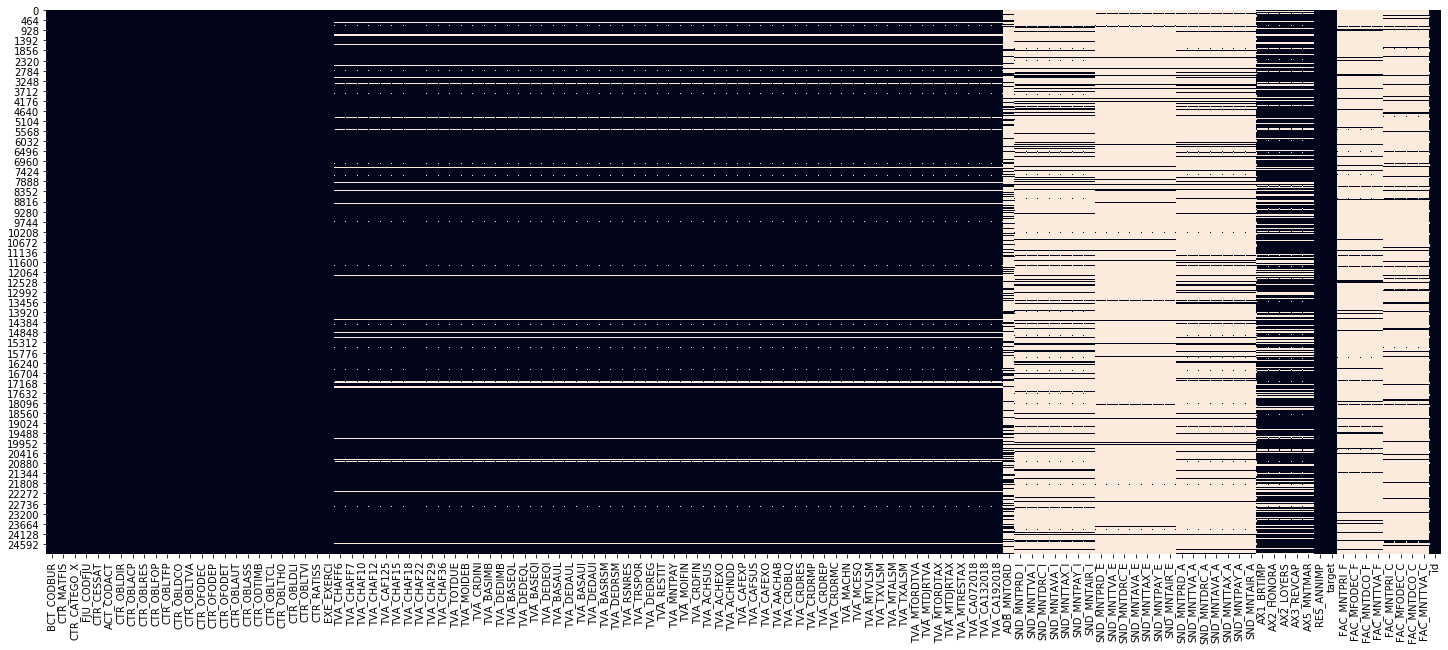

In [782]:
# afficher le remplissage du df en heatmap 
plt.figure(figsize=(25,10))
sns.heatmap(df.isna(), cbar=False)

In [849]:
# afficher le pourcentage des valeurs NAN
#autre méthode: df.isna().sum()/len(df)
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

BCT_CODBUR      0.000000
target          0.000000
RES_ANNIMP      0.000000
EXE_EXERCI      0.000000
CTR_RATISS      0.000000
CTR_OBLTCL      0.000000
CTR_OBLTVA      0.000000
CTR_OBLDCO      0.000000
CTR_OBLTFP      0.000000
id              0.000000
CTR_OBLRES      0.000000
CTR_OBLFOP      0.000000
CTR_CATEGO_X    0.000000
CTR_MATFIS      0.000000
CTR_CESSAT      0.000000
ACT_CODACT      0.000000
FJU_CODFJU      0.000000
CTR_OBLDIR      0.000000
CTR_OBLACP      0.000000
CTR_OBLASS      0.000399
CTR_ODTIMB      0.000399
CTR_OFODET      0.000399
CTR_OBLTHO      0.000399
CTR_OBLDLI      0.000399
CTR_OBLTVI      0.000399
CTR_OFODEP      0.000399
CTR_OFODEC      0.000399
CTR_OBLAUT      0.000399
TVA_CRDREP      0.078793
TVA_CRDRMP      0.078793
TVA_CRDBLQ      0.078793
TVA_AACHAB      0.078793
TVA_ACHSUS      0.078793
TVA_CAFSUS      0.078793
TVA_ACHNDD      0.078793
TVA_ACHEXO      0.078793
TVA_CRDRMC      0.078793
TVA_CAFEXO      0.078793
TVA_MACHN       0.078793
TVA_MTDJRTAX    0.078793


In [850]:
# afficher les colonnes avec des valeurs NAN au dela de 90% et moins de 90% de valeurs NAN
df.isna().sum()/df.shape[0] < 0.9

BCT_CODBUR       True
CTR_MATFIS       True
CTR_CATEGO_X     True
FJU_CODFJU       True
CTR_CESSAT       True
ACT_CODACT       True
CTR_OBLDIR       True
CTR_OBLACP       True
CTR_OBLRES       True
CTR_OBLFOP       True
CTR_OBLTFP       True
CTR_OBLDCO       True
CTR_OBLTVA       True
CTR_OFODEC       True
CTR_OFODEP       True
CTR_OFODET       True
CTR_OBLAUT       True
CTR_OBLASS       True
CTR_ODTIMB       True
CTR_OBLTCL       True
CTR_OBLTHO       True
CTR_OBLDLI       True
CTR_OBLTVI       True
CTR_RATISS       True
EXE_EXERCI       True
TVA_CHAFF6       True
TVA_CHAFF7       True
TVA_CHAF10       True
TVA_CHAF12       True
TVA_CAF125       True
TVA_CHAF15       True
TVA_CHAF18       True
TVA_CHAF22       True
TVA_CHAF29       True
TVA_CHAF36       True
TVA_TOTDUE       True
TVA_MOIDEB       True
TVA_CRDINI       True
TVA_BASIMB       True
TVA_DEDIMB       True
TVA_BASEQL       True
TVA_DEDEQL       True
TVA_BASEQI       True
TVA_DEDEQI       True
TVA_BASAUL       True
TVA_DEDAUL

In [851]:
# afficher les noms des colonnes avec les valeurs NAN au moins de 90% 
df.columns[df.isna().sum()/df.shape[0] < 0.9]

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       ...
       'SND_MNTPAY_A', 'SND_MNTAIR_A', 'AX1_BRTIMP', 'AX2_HONORA',
       'AX2_LOYERS', 'AX3_REVCAP', 'AX5_MNTMAR', 'RES_ANNIMP', 'target', 'id'],
      dtype='object', length=106)

# df < 90% NAN

In [852]:
# créer un nouveau df avec NAN < 90%
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]] 
df

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,id
0,49,14185,P,99,1,6101,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,52600000.0,0.0,0.0,6.125000e+05,0.0,0.0,0.0,6422250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.000000e+00,2013,13.575957,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,12000000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,720000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.000000e+00,2013,11.692894,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,31926026.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,3831117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,0.0,0.0,31150.0,12.0,192751.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000000,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.0,45425.0,0.0,0.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1680387.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,16.237871,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,10999653.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1319958.0,1.0,0.0,0.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21604529.0,0.0,0.0,0.000000e+00,2015,13.399983,train_id4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [853]:
df['TVA_CA192018'].value_counts()

0.000000e+00    22896
4.379372e+09        1
6.165911e+08        1
1.277954e+07        1
4.896275e+07        1
4.895474e+07        1
5.255421e+08        1
2.040396e+08        1
5.254428e+08        1
2.340263e+07        1
1.017308e+09        1
2.400000e+06        1
3.250000e+07        1
1.094429e+09        1
1.103404e+08        1
1.061398e+08        1
5.726397e+07        1
5.470881e+08        1
1.709370e+07        1
4.201008e+09        1
2.966953e+07        1
4.411508e+08        1
1.330500e+07        1
6.130000e+06        1
3.273864e+09        1
2.048081e+08        1
2.485065e+09        1
1.279540e+08        1
2.223525e+08        1
8.894021e+08        1
3.958606e+09        1
4.322268e+06        1
6.915117e+07        1
6.200612e+08        1
1.367726e+10        1
2.613419e+09        1
3.600000e+06        1
3.088985e+07        1
3.992211e+06        1
1.350826e+11        1
2.773110e+07        1
2.473659e+09        1
5.091712e+06        1
3.089853e+08        1
4.096271e+08        1
3.528179e+

In [854]:
tva = df[['TVA_CHAFF6','TVA_CHAFF7','TVA_CHAF10',
'TVA_CHAF12',
'TVA_CAF125',
'TVA_CHAF15',
'TVA_CHAF18',
'TVA_CHAF22',
'TVA_CHAF29',
'TVA_CHAF36',
'TVA_TOTDUE',
'TVA_MOIDEB',
'TVA_CRDINI',
'TVA_BASIMB',
'TVA_DEDIMB',
'TVA_BASEQL',
'TVA_DEDEQL',
'TVA_BASEQI',
'TVA_DEDEQI',
'TVA_BASAUL',
'TVA_DEDAUL',
'TVA_BASAUI',
'TVA_DEDAUI',
'TVA_BASRSM',
'TVA_DEDRSM',
'TVA_RSNRES',
'TVA_TRSPOR',
'TVA_DEDREG',
'TVA_RESTIT',
'TVA_MNTPAY',
'TVA_MOIFIN',
'TVA_CRDFIN',
'TVA_ACHSUS',
'TVA_ACHEXO',
'TVA_ACHNDD',
'TVA_CAFEXP',
'TVA_CAFSUS',
'TVA_CAFEXO',
'TVA_AACHAB',
'TVA_CRDBLQ',
'TVA_CRDRES',
'TVA_CRDRMP',
'TVA_CRDREP',
'TVA_CRDRMC',
'TVA_MACHN',
'TVA_MCESQ',
'TVA_MTVLSM',
'TVA_TXVLSM',
'TVA_MTALSM',
'TVA_TXALSM',
'TVA_MTORDTVA',
'TVA_MTDJRTVA',
'TVA_MTORDTAX',
'TVA_MTDJRTAX',
'TVA_MTRESTAX',
'TVA_CA072018',
'TVA_CA132018',
'TVA_CA192018']]

In [855]:
# définir les colonnes TVA' a supprimer '
for col in tva:
    ratio = (df[col]== 0).value_counts() / len(df[col]) > 0.9
    print(ratio)
    

True     False
False    False
Name: TVA_CHAFF6, dtype: bool
True      True
False    False
Name: TVA_CHAFF7, dtype: bool
True      True
False    False
Name: TVA_CHAF10, dtype: bool
True     False
False    False
Name: TVA_CHAF12, dtype: bool
True      True
False    False
Name: TVA_CAF125, dtype: bool
True      True
False    False
Name: TVA_CHAF15, dtype: bool
False    False
True     False
Name: TVA_CHAF18, dtype: bool
True     False
False    False
Name: TVA_CHAF22, dtype: bool
True      True
False    False
Name: TVA_CHAF29, dtype: bool
True      True
False    False
Name: TVA_CHAF36, dtype: bool
False    False
True     False
Name: TVA_TOTDUE, dtype: bool
False    True
Name: TVA_MOIDEB, dtype: bool
False    False
True     False
Name: TVA_CRDINI, dtype: bool
True      True
False    False
Name: TVA_BASIMB, dtype: bool
True      True
False    False
Name: TVA_DEDIMB, dtype: bool
True     False
False    False
Name: TVA_BASEQL, dtype: bool
True     False
False    False
Name: TVA_DEDEQL, dtype: b

In [856]:
# supprimer la colonne : 'id'/ codes / année dupliquer / taux d''obligation'
df = df.drop(['BCT_CODBUR','CTR_MATFIS','FJU_CODFJU', 'ACT_CODACT','CTR_OBLDIR','CTR_OBLACP','CTR_OBLRES','CTR_OBLFOP','CTR_OBLTFP','CTR_OBLDCO','CTR_OBLTVA','CTR_OFODEC','CTR_OFODEP','CTR_OFODET','CTR_OBLAUT','CTR_OBLASS','CTR_ODTIMB','CTR_OBLTCL','CTR_OBLTHO','CTR_OBLDLI','CTR_OBLTVI','CTR_RATISS','RES_ANNIMP','id', 'TVA_CHAFF7' ,'TVA_CHAF10', 'TVA_CAF125', 'TVA_CHAF15'  ,  'TVA_CHAF29' ,'TVA_CHAF36' ,'TVA_MOIDEB' , 'TVA_BASIMB', 'TVA_DEDIMB' , 'TVA_RSNRES' ,'TVA_TRSPOR' ,'TVA_MOIFIN', 'TVA_ACHSUS' , 'TVA_ACHEXO' , 'TVA_ACHNDD' ,'TVA_AACHAB' ,'TVA_CRDBLQ', 'TVA_CRDRES', 'TVA_CRDRMP' ,'TVA_CRDREP', 'TVA_MTVLSM', 'TVA_TXVLSM', 'TVA_MTALSM', 'TVA_TXALSM' ,'TVA_MTORDTVA' ,'TVA_MTDJRTVA', 'TVA_MTORDTAX' ,'TVA_MTDJRTAX' ,'TVA_MTRESTAX' ,'TVA_CA072018' ,'TVA_CA132018' ,'TVA_CA192018'],  axis=1)

# df

In [857]:
df

,CTR_CATEGO_X,CTR_CESSAT,EXE_EXERCI,TVA_CHAFF6,TVA_CHAF12,TVA_CHAF18,TVA_CHAF22,TVA_TOTDUE,TVA_CRDINI,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_CRDFIN,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target
0,P,1,2013,0.0,52600000.0,6.125000e+05,0.0,6422250.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.000000e+00,13.575957
1,P,0,2013,12000000.0,0.0,0.000000e+00,0.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.000000e+00,11.692894
2,P,0,2015,0.0,31926026.0,0.000000e+00,0.0,3831117.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,31150.0,192751.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,M,0,2015,0.0,0.0,0.000000e+00,0.0,0.0,45425.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1680387.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.237871
4,P,0,2015,0.0,10999653.0,0.000000e+00,0.0,1319958.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21604529.0,0.0,0.0,0.000000e+00,13.399983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,C,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.355379e+08,16.183079
25049,M,0,2015,0.0,0.0,1.943510e+09,0.0,349831750.0,278182901.0,0.0,0.0,0.0,0.0,3.240247e+09,583246881.0,0.0,0.0,15982684.0,7991342.0,0.0,0.0,0.0,503679542.0,1.258497e+09,49339033.0,0.0,0.0,17404727.0,1303829.0,NaN,1.322304e+09,252630377.0,1965479.0,0.0,89303793.0,343899649.0,3857872.0,48566562.0,0.0,0.0,0.0,150000.0,150000.0,0.0,0.0,0.0,1416500.0,8656338.0,1.301083e+09,0.000000
25050,P,0,2013,109424528.0,0.0,0.000000e+00,0.0,6565465.0,2766494.0,4676425.0,841756.0,0.0,0.0,9.816865e+06,1690411.0,0.0,0.0,0.0,0.0,0.0,0.0,1266808.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4560000.0,0.0,419726.0,0.000000e+00,15.320684
25051,P,0,2013,0.0,107800000.0,0.000000e+00,0.0,12936000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12936000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120736000.0,0.0,0.0,0.000000e+00,15.682378


In [858]:
df.columns

Index(['CTR_CATEGO_X', 'CTR_CESSAT', 'EXE_EXERCI', 'TVA_CHAFF6', 'TVA_CHAF12',
       'TVA_CHAF18', 'TVA_CHAF22', 'TVA_TOTDUE', 'TVA_CRDINI', 'TVA_BASEQL',
       'TVA_DEDEQL', 'TVA_BASEQI', 'TVA_DEDEQI', 'TVA_BASAUL', 'TVA_DEDAUL',
       'TVA_BASAUI', 'TVA_DEDAUI', 'TVA_BASRSM', 'TVA_DEDRSM', 'TVA_DEDREG',
       'TVA_RESTIT', 'TVA_MNTPAY', 'TVA_CRDFIN', 'TVA_CAFEXP', 'TVA_CAFSUS',
       'TVA_CAFEXO', 'TVA_CRDRMC', 'TVA_MACHN', 'TVA_MCESQ', 'ADB_MNTORD',
       'SND_MNTPRD_I', 'SND_MNTTVA_I', 'SND_MNTDRC_I', 'SND_MNTAVA_I',
       'SND_MNTTAX_I', 'SND_MNTPAY_I', 'SND_MNTAIR_I', 'SND_MNTPRD_A',
       'SND_MNTTVA_A', 'SND_MNTDRC_A', 'SND_MNTAVA_A', 'SND_MNTTAX_A',
       'SND_MNTPAY_A', 'SND_MNTAIR_A', 'AX1_BRTIMP', 'AX2_HONORA',
       'AX2_LOYERS', 'AX3_REVCAP', 'AX5_MNTMAR', 'target'],
      dtype='object')

### Relation "année / target"

In [859]:
df_ann = df[['EXE_EXERCI','target']]

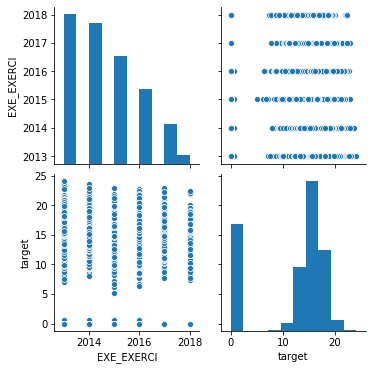

In [860]:
sns.pairplot(df_ann)

In [861]:
df.groupby(['EXE_EXERCI', 'target']).count().head(100)

CTR_CATEGO_X  CTR_CESSAT  TVA_CHAFF6  TVA_CHAF12  \
EXE_EXERCI target                                                        
2013       0.000000           1872        1872        1696        1696   
           0.693147              5           5           5           5   
           7.100027              1           1           1           1   
           7.496097              1           1           1           1   
           8.225503              1           1           1           1   
           8.401782              1           1           1           1   
           8.469263              1           1           1           1   
           8.613049              1           1           1           1   
           8.651724              1           1           1           1   
           8.877661              1           1           1           1   
           9.276034              1           1           1           1   
           9.279400              1           1           1           1   
           9.325988              1           1           1           1   
           9.328212              1           1           1           1   
           9.357294              1           1           1           1   
           9.357553              1           1           1           1   
           9.417598              1           1           1           1   
           9.615872              1           1           0           0   
           9.749345              1           1           1           1   
           9.751385              1           1           1           1   
           9.782562              1           1           1           1   
           9.798183              1           1           1           1   
           9.850930              1           1           1           1   
           9.883285              1           1           1           1   
           9.974039              1           1           1           1   
           10.017307             1           1           1           1   
           10.085851             1           1           0           0   
           10.157703             1           1           1           1   
           10.230306             1           1           1           1   
           10.236167             1           1           1           1   
           10.308986             1           1           1           1   
           10.357267             1           1           1           1   
           10.377950             1           1           1           1   
           10.462989             1           1           1           1   
           10.558180             1           1           1           1   
           10.563181             1           1           1           1   
           10.656224             1           1           1           1   
           10.705825             1           1           1           1   
           10.714440             1           1           0           0   
           10.732280             1           1           1           1   
           10.753211             1           1           1           1   
           10.804868             1           1           1           1   
           10.825820             1           1           1           1   
           10.860901             1           1           1           1   
           10.947872             1           1           1           1   
           10.949648             1           1           1           1   
           11.002117             1           1           1           1   
           11.084954             1           1           1           1   
           11.105198             1           1           1           1   
           11.117406             1           1           1           1   
           11.119364             1           1           1           1   
           11.136806             1           1           1           1   
           11.166554      

### "CTR_CATEGO_X"  valeur 'object' 

In [862]:
df['CTR_CATEGO_X'].unique()

array(['P', 'M', 'C', 'N'], dtype=object)

In [863]:
df['CTR_CATEGO_X'].value_counts()

M    12809
C     6835
P     5398
N       11
Name: CTR_CATEGO_X, dtype: int64

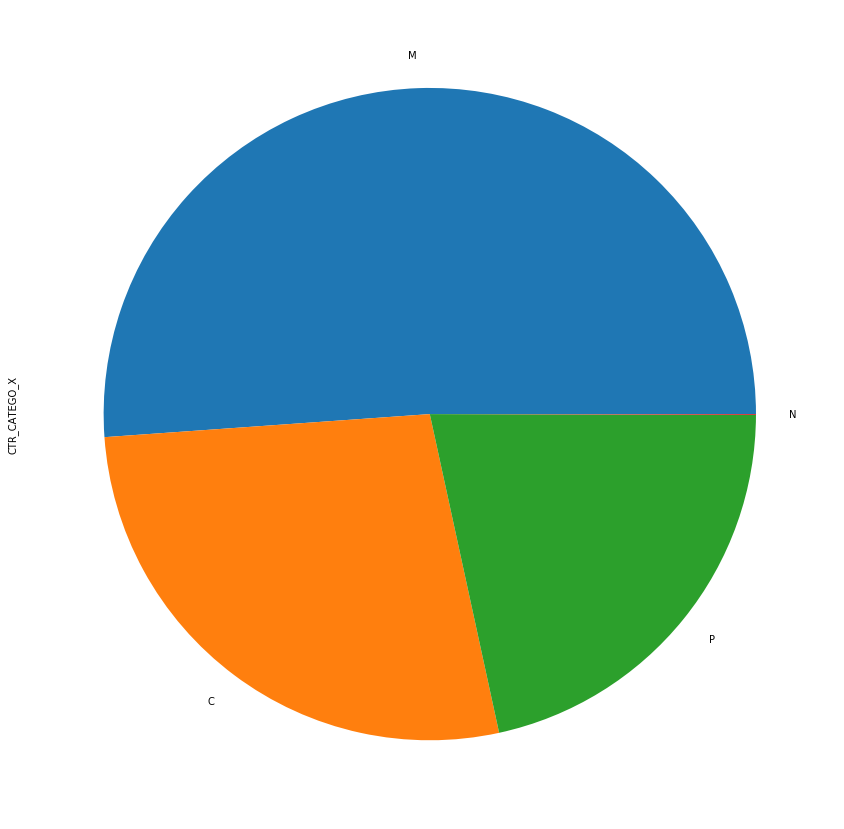

In [864]:
df['CTR_CATEGO_X'].value_counts().plot.pie()


#### Etude de la target:

In [865]:
df['target'].isna().sum()

0

In [866]:
df['target'].shape

(25053,)

In [867]:
df['target'].value_counts()

0.000000     6325
0.693147       18
12.100718      16
14.585619      11
12.117526       9
             ... 
15.221883       1
17.443046       1
15.898563       1
13.928408       1
17.725928       1
Name: target, Length: 18370, dtype: int64

In [868]:
df['target'].value_counts() !=0

0.000000     True
0.693147     True
12.100718    True
14.585619    True
12.117526    True
             ... 
15.221883    True
17.443046    True
15.898563    True
13.928408    True
17.725928    True
Name: target, Length: 18370, dtype: bool

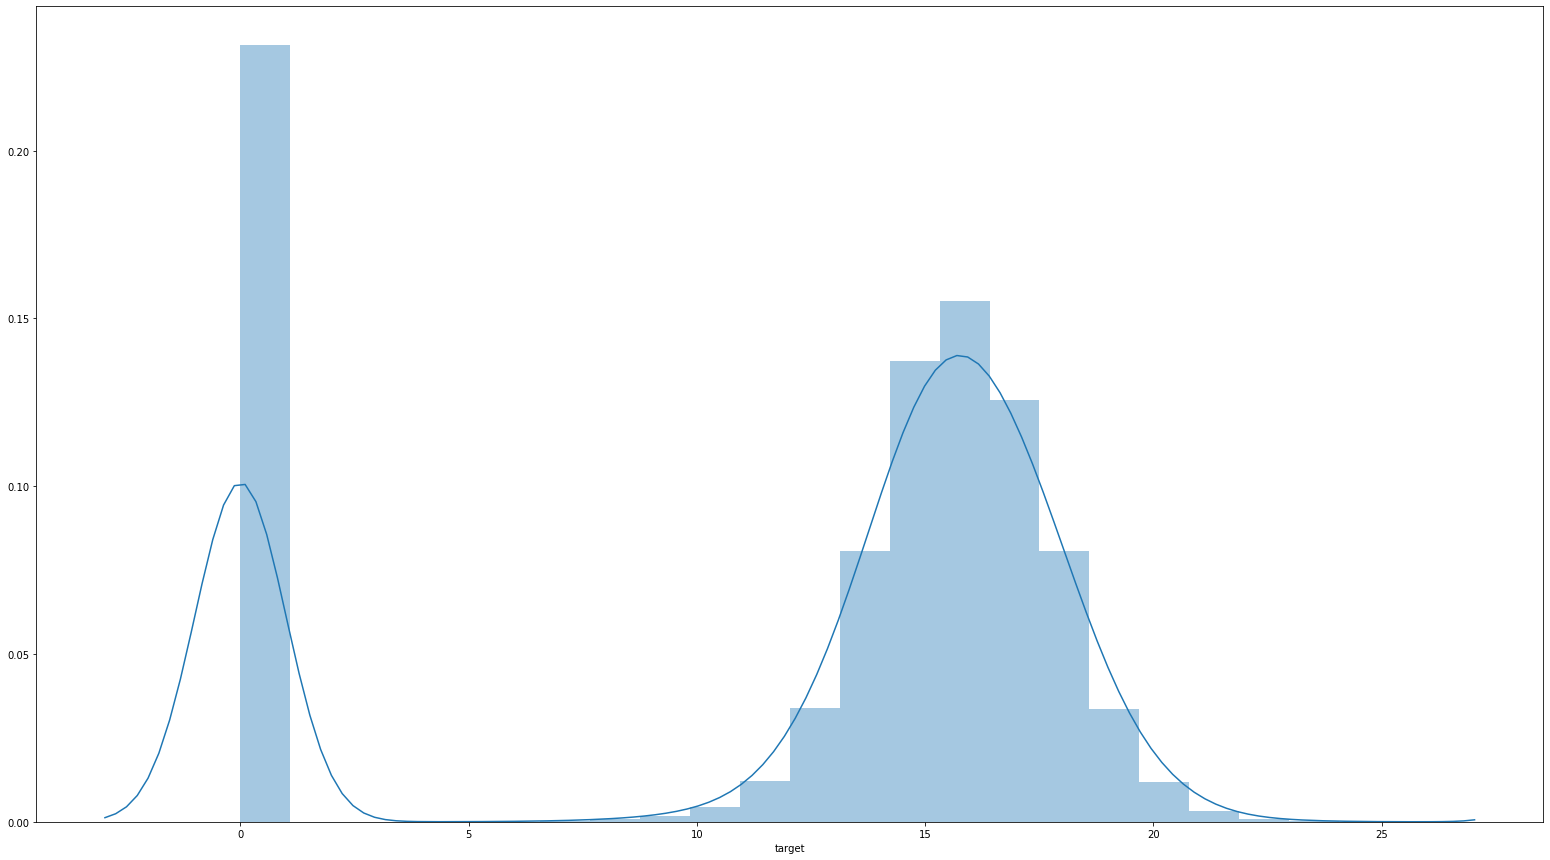

In [869]:
sns.distplot(df['target'])

### Création de deux df :
#### n_fr : non fraudeurs 
#### fr :     fraudeurs 

In [870]:
n_fr = df[df['target'] ==0]
fr = df[df['target'] != 0]

In [871]:
n_fr

,CTR_CATEGO_X,CTR_CESSAT,EXE_EXERCI,TVA_CHAFF6,TVA_CHAF12,TVA_CHAF18,TVA_CHAF22,TVA_TOTDUE,TVA_CRDINI,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_CRDFIN,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target
2,P,0,2015,0.0,31926026.0,0.000000e+00,0.0,3.831117e+06,0.000000e+00,0.0,0.0,0.0,0.0,1.886150e+07,2.209299e+06,0.000000e+00,0.000000e+00,3566839.0,1783419.0,0.0,0.000000e+00,31150.0,192751.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,M,0,2013,0.0,0.0,3.420157e+07,0.0,6.156282e+06,1.575349e+07,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,9597209.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,40357854.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,M,0,2014,0.0,0.0,5.415305e+08,0.0,9.747548e+07,8.826676e+07,0.0,0.0,0.0,0.0,1.739615e+08,3.060857e+07,3.637110e+08,6.543137e+07,0.0,0.0,0.0,0.000000e+00,0.0,86831235.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,2.164410e+08,6.428044e+07,272665.0,0.0,73727432.0,1.382805e+08,1.128257e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.621320e+06,0.0
16,M,0,2014,0.0,0.0,7.711313e+08,0.0,1.388036e+08,7.555872e+06,0.0,0.0,0.0,0.0,6.313471e+08,1.087596e+08,0.000000e+00,0.000000e+00,40500012.0,20250006.0,0.0,0.000000e+00,19088872.0,16850766.0,5.033386e+07,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,33188985.0,0.0,0.0,1.526048e+09,0.0
17,M,0,2016,0.0,0.0,1.713629e+10,0.0,3.084532e+09,1.382065e+09,0.0,0.0,0.0,0.0,4.668803e+09,8.150345e+08,1.351133e+10,2.432040e+09,93257464.0,23314366.0,0.0,1.588397e+09,125466798.0,104990786.0,7.811132e+09,4.179611e+09,0.0,0.0,17416897.0,1.349238e+09,NaN,1.225413e+10,2.227577e+09,9240.0,0.0,577122433.0,2.804708e+09,1.108068e+07,1.274057e+10,25503375.0,0.0,0.0,6449830.0,31953205.0,0.0,0.0,15602500.0,0.0,0.0,6.131419e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25027,M,0,2015,0.0,0.0,0.000000e+00,0.0,0.000000e+00,4.320970e+05,0.0,0.0,0.0,0.0,2.894227e+06,4.932290e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,925326.0,0.000000e+00,3.316168e+08,27361000.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.347119e+08,0.0
25033,M,0,2014,0.0,0.0,0.000000e+00,0.0,0.000000e+00,9.516734e+07,0.0,0.0,0.0,0.0,1.203845e+08,3.009773e+06,0.000000e+00,0.000000e+00,0.0,0.0,0.0,8.402044e+07,0.0,14156681.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25039,P,0,2013,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,59167978.0,7466754.0,0.0,0.0,2.445311e+06,3.817530e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,36068845.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25041,M,0,2015,27086662.0,35000.0,2.337056e+10,0.0,4.208330e+09,7.027918e+08,0.0,0.0,0.0,0.0,9.014046e+09,1.599240e+09,1.373241e+10,2.471834e+09,27247448.0,13623724.0,0.0,0.000000e+00,0.0,579159797.0,9.573787e+08,1.679015e+09,0.0,0.0,0.0,0.000000e+00,1288820.0,1.318238e+10,2.385316e+09,0.0,0.0,143271729.0,2.528588e+09,9.146184e+07,2.500000e+06,0.0,0.0,0.0,20000.0,20000.0,0.0,0.0,153846160.0,32188293.0,0.0,5.895192e+09,0.0


### Créer des sous-ensembles 'subset' : SND_I  , SND_A, ADB

In [872]:
##df.isna().sum()/len(df)
missing_rate = df.isna().sum()/df.shape[0]

In [873]:
snd_i_columns = df.columns[(missing_rate< 0.86) & (missing_rate> 0.82)]
snd_a_columns = df.columns[(missing_rate< 0.9) & (missing_rate> 0.86)]
adb_columns = df.columns[(missing_rate< 0.75) & (missing_rate> 0.74)]
snd = df.columns[(missing_rate< 0.9)& (missing_rate > 0.82)]

### Target / SND_I

In [874]:
snd_i_columns

Index(['SND_MNTPRD_I', 'SND_MNTTVA_I', 'SND_MNTDRC_I', 'SND_MNTAVA_I',
       'SND_MNTTAX_I', 'SND_MNTPAY_I', 'SND_MNTAIR_I'],
      dtype='object')

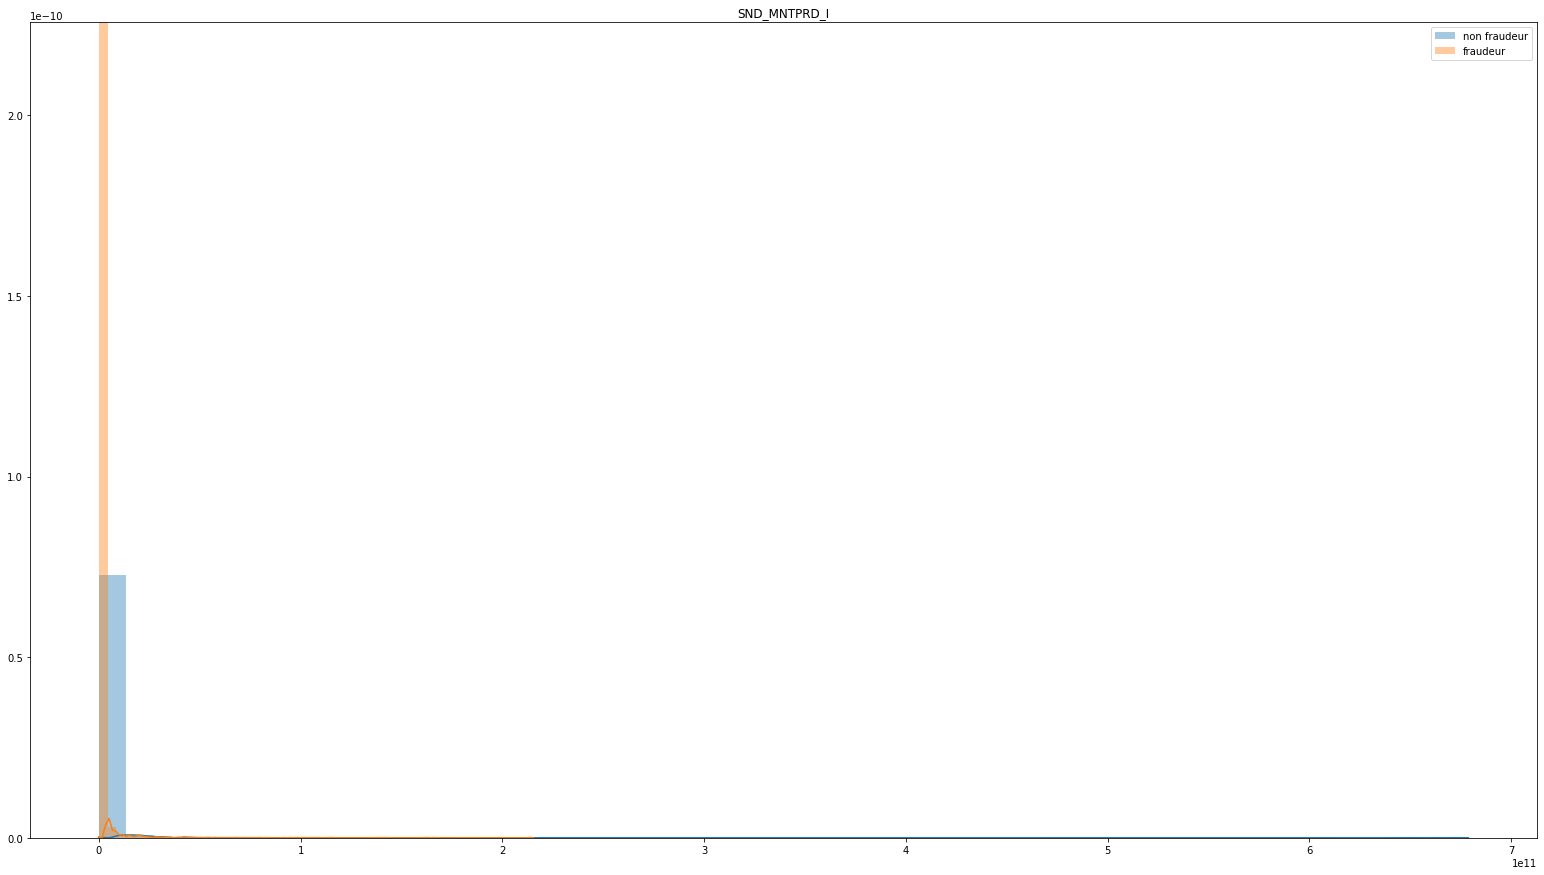

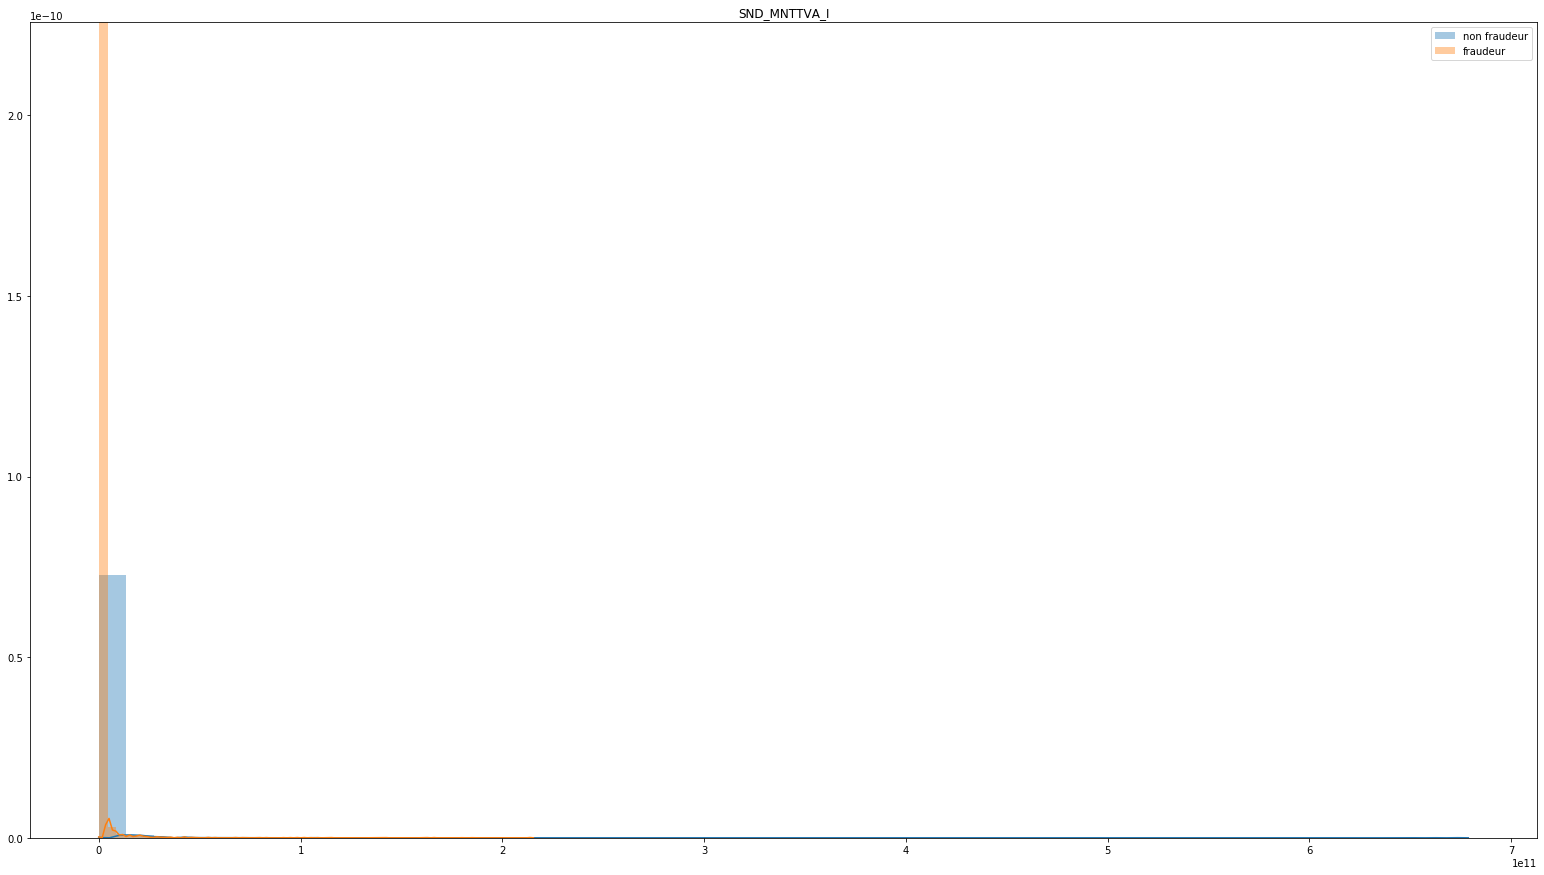

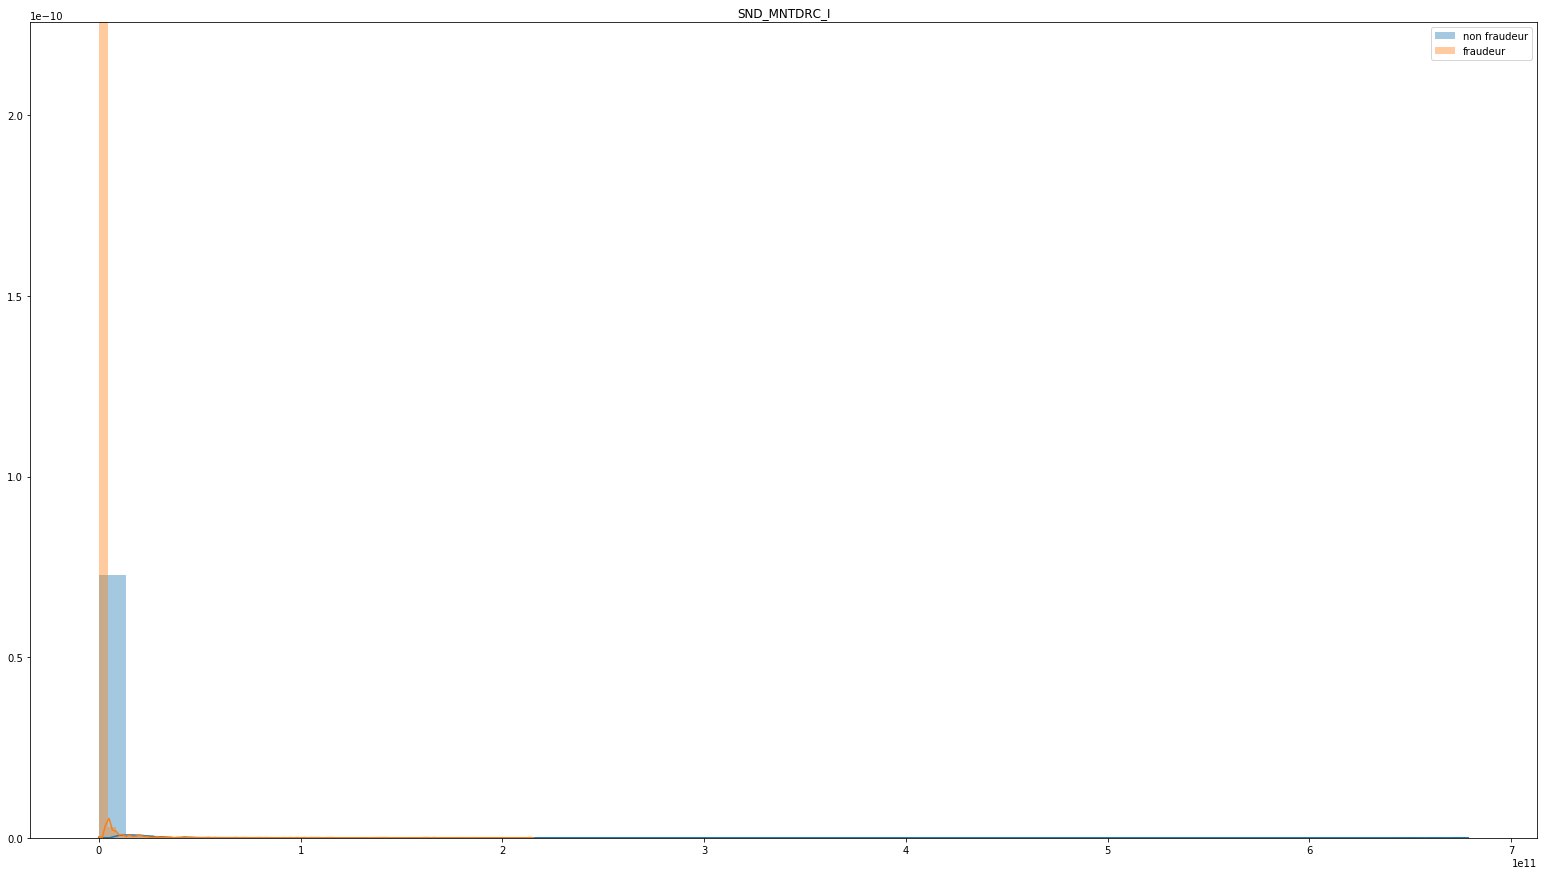

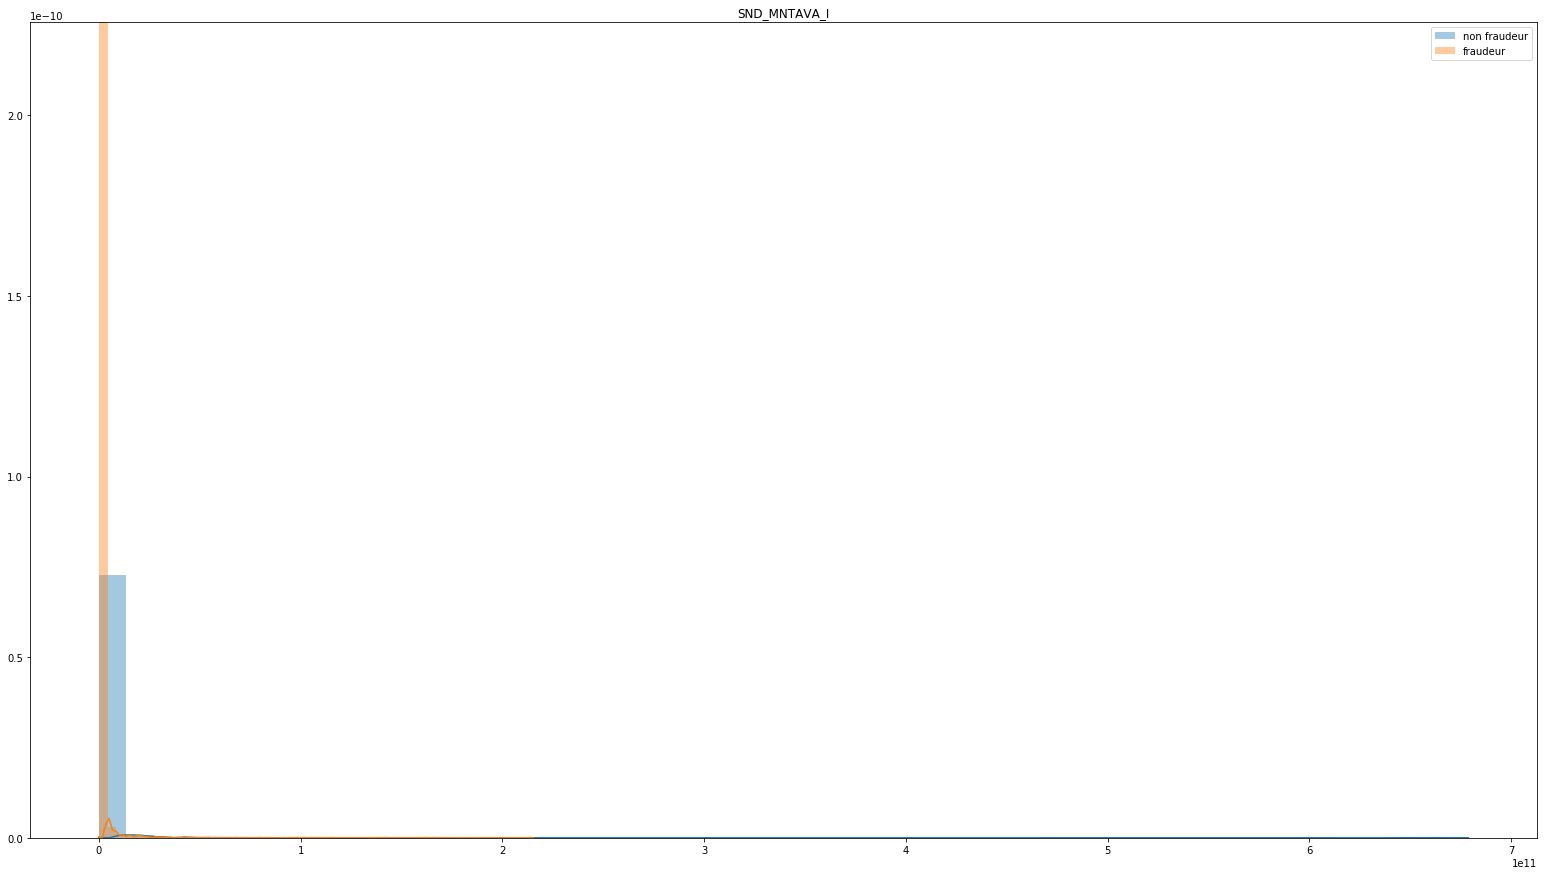

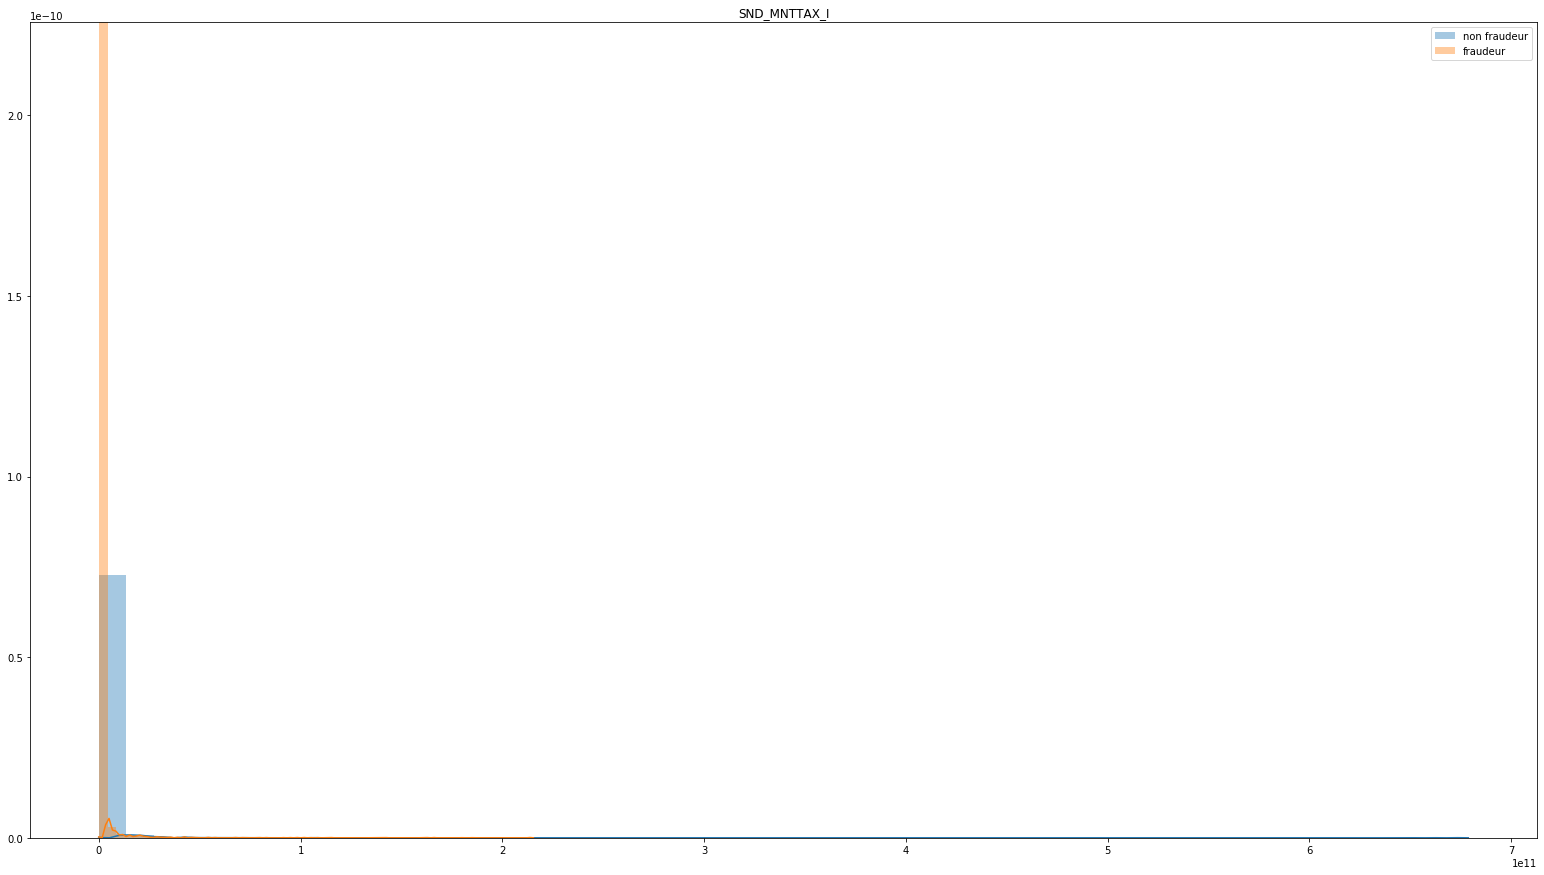

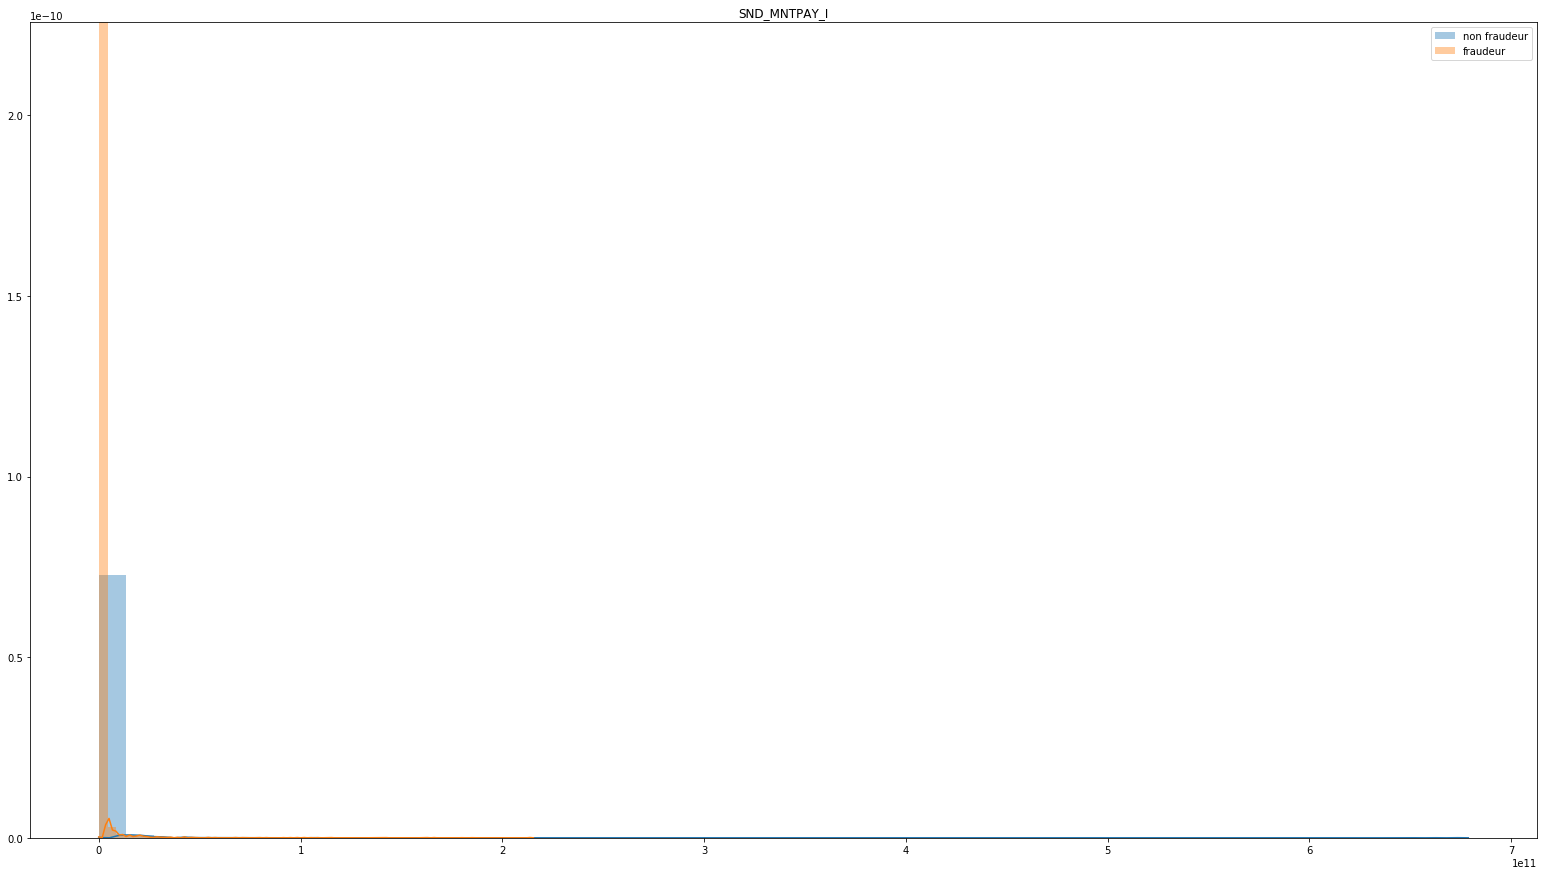

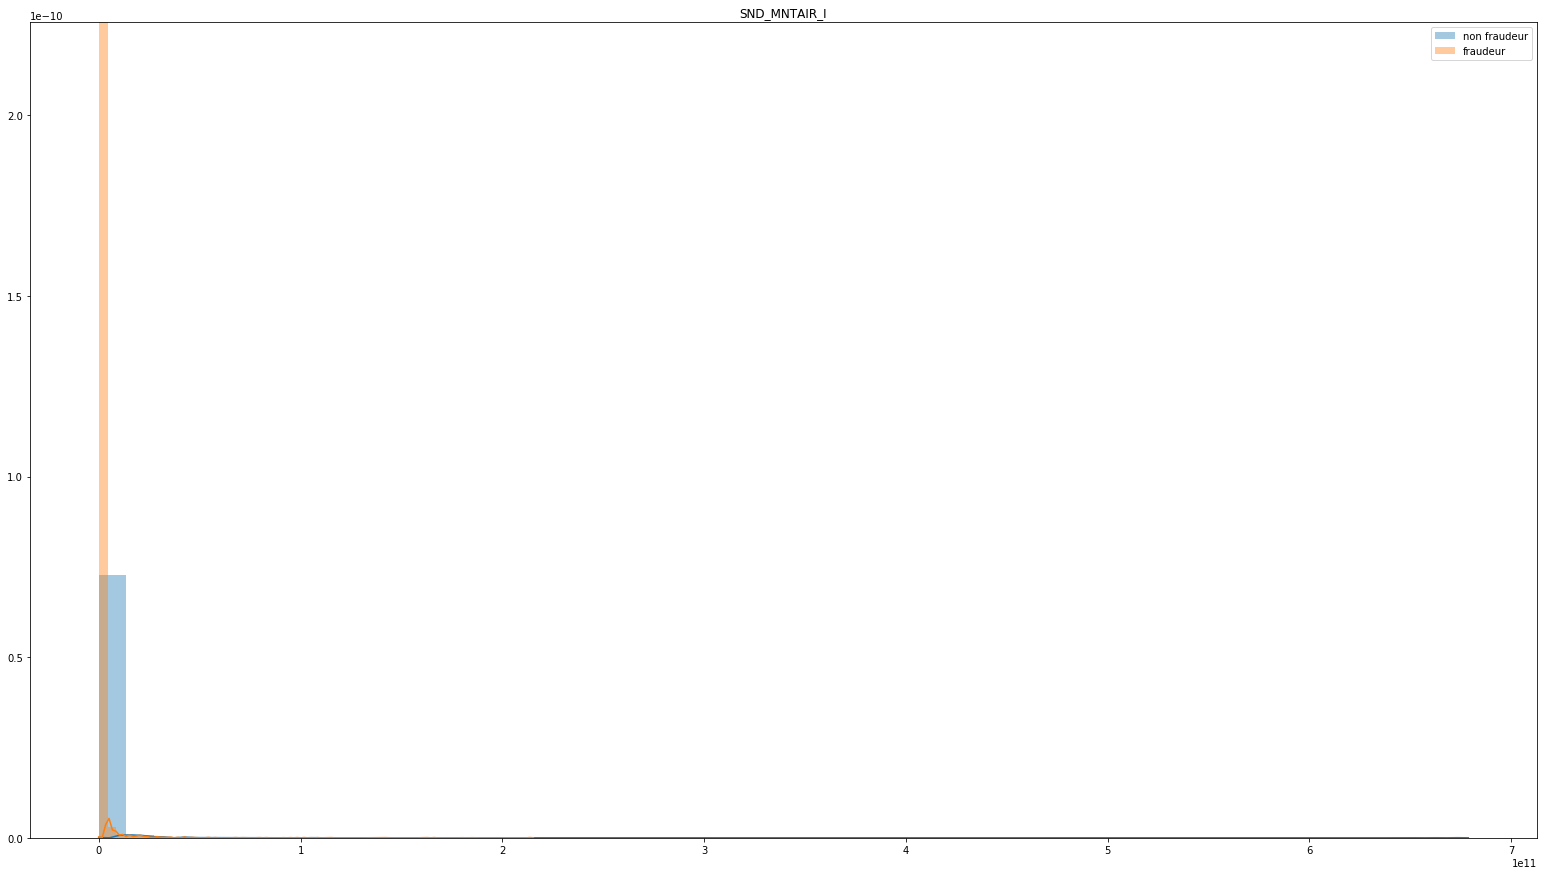

In [875]:
for col in snd_i_columns:
    plt.figure()
    sns.distplot(n_fr[snd_i_columns], label = 'non fraudeur')
    sns.distplot(fr[snd_i_columns], label = 'fraudeur')
    plt.title(col)
    plt.legend()
    plt.show()


### Target / SND_A

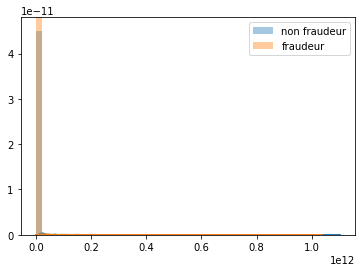

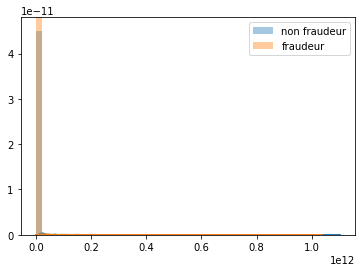

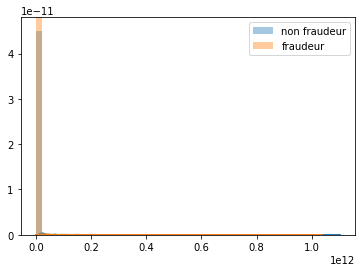

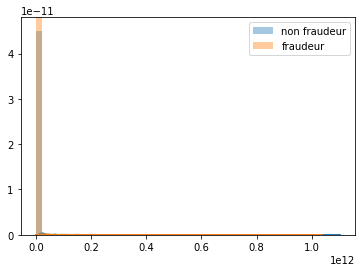

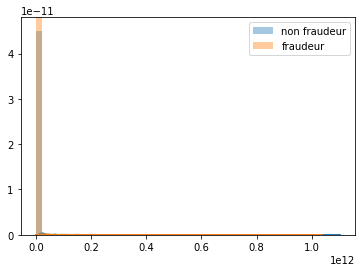

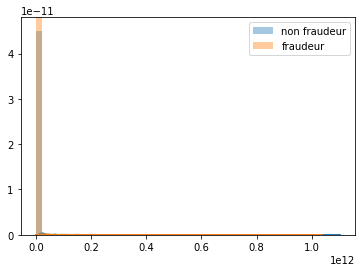

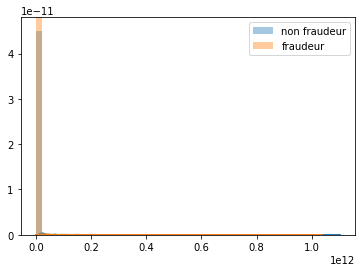

In [511]:
for col in snd_a_columns:
    plt.figure()
    sns.distplot(n_fr[snd_a_columns], label = 'non fraudeur')
    sns.distplot(fr[snd_a_columns], label = 'fraudeur')
    plt.legend()

### Target / ADB

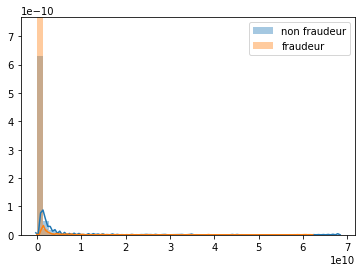

In [531]:
for col in adb_columns:
    plt.figure()
    sns.distplot(n_fr[adb_columns], label = 'non fraudeur')
    sns.distplot(fr[adb_columns], label = 'fraudeur')
    plt.legend()

No handles with labels found to put in legend.


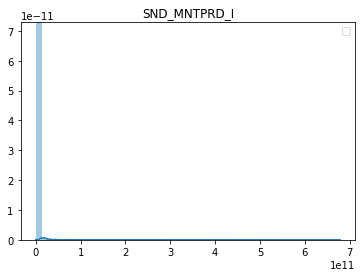

No handles with labels found to put in legend.


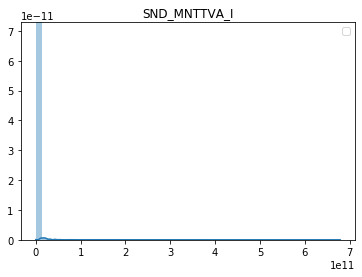

No handles with labels found to put in legend.


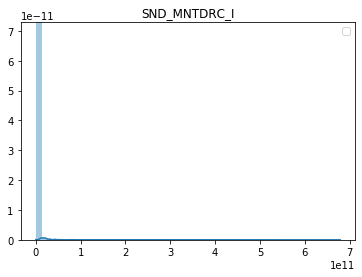

No handles with labels found to put in legend.


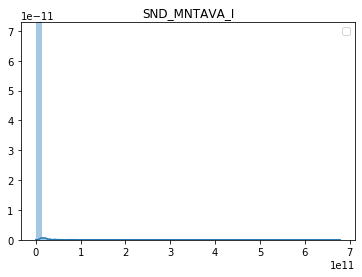

No handles with labels found to put in legend.


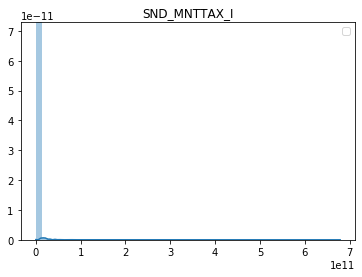

No handles with labels found to put in legend.


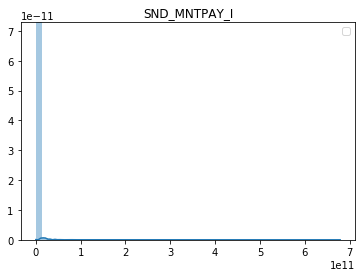

No handles with labels found to put in legend.


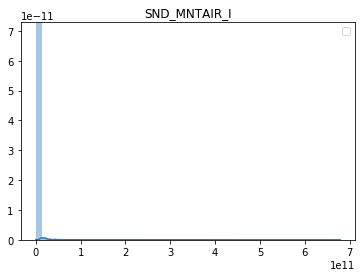

In [545]:
for col in snd_i_columns:
    plt.figure()
    sns.distplot(df[snd_i_columns])
    #sns.distplot(fr[snd_i_columns], label = 'fraudeur')
    plt.title(col)
    plt.legend()
    plt.show()


In [878]:
df_ax = df[['AX1_BRTIMP', 'AX2_HONORA', 'AX2_LOYERS', 'AX3_REVCAP' ,'AX5_MNTMAR','EXE_EXERCI' ,'ADB_MNTORD','target']]

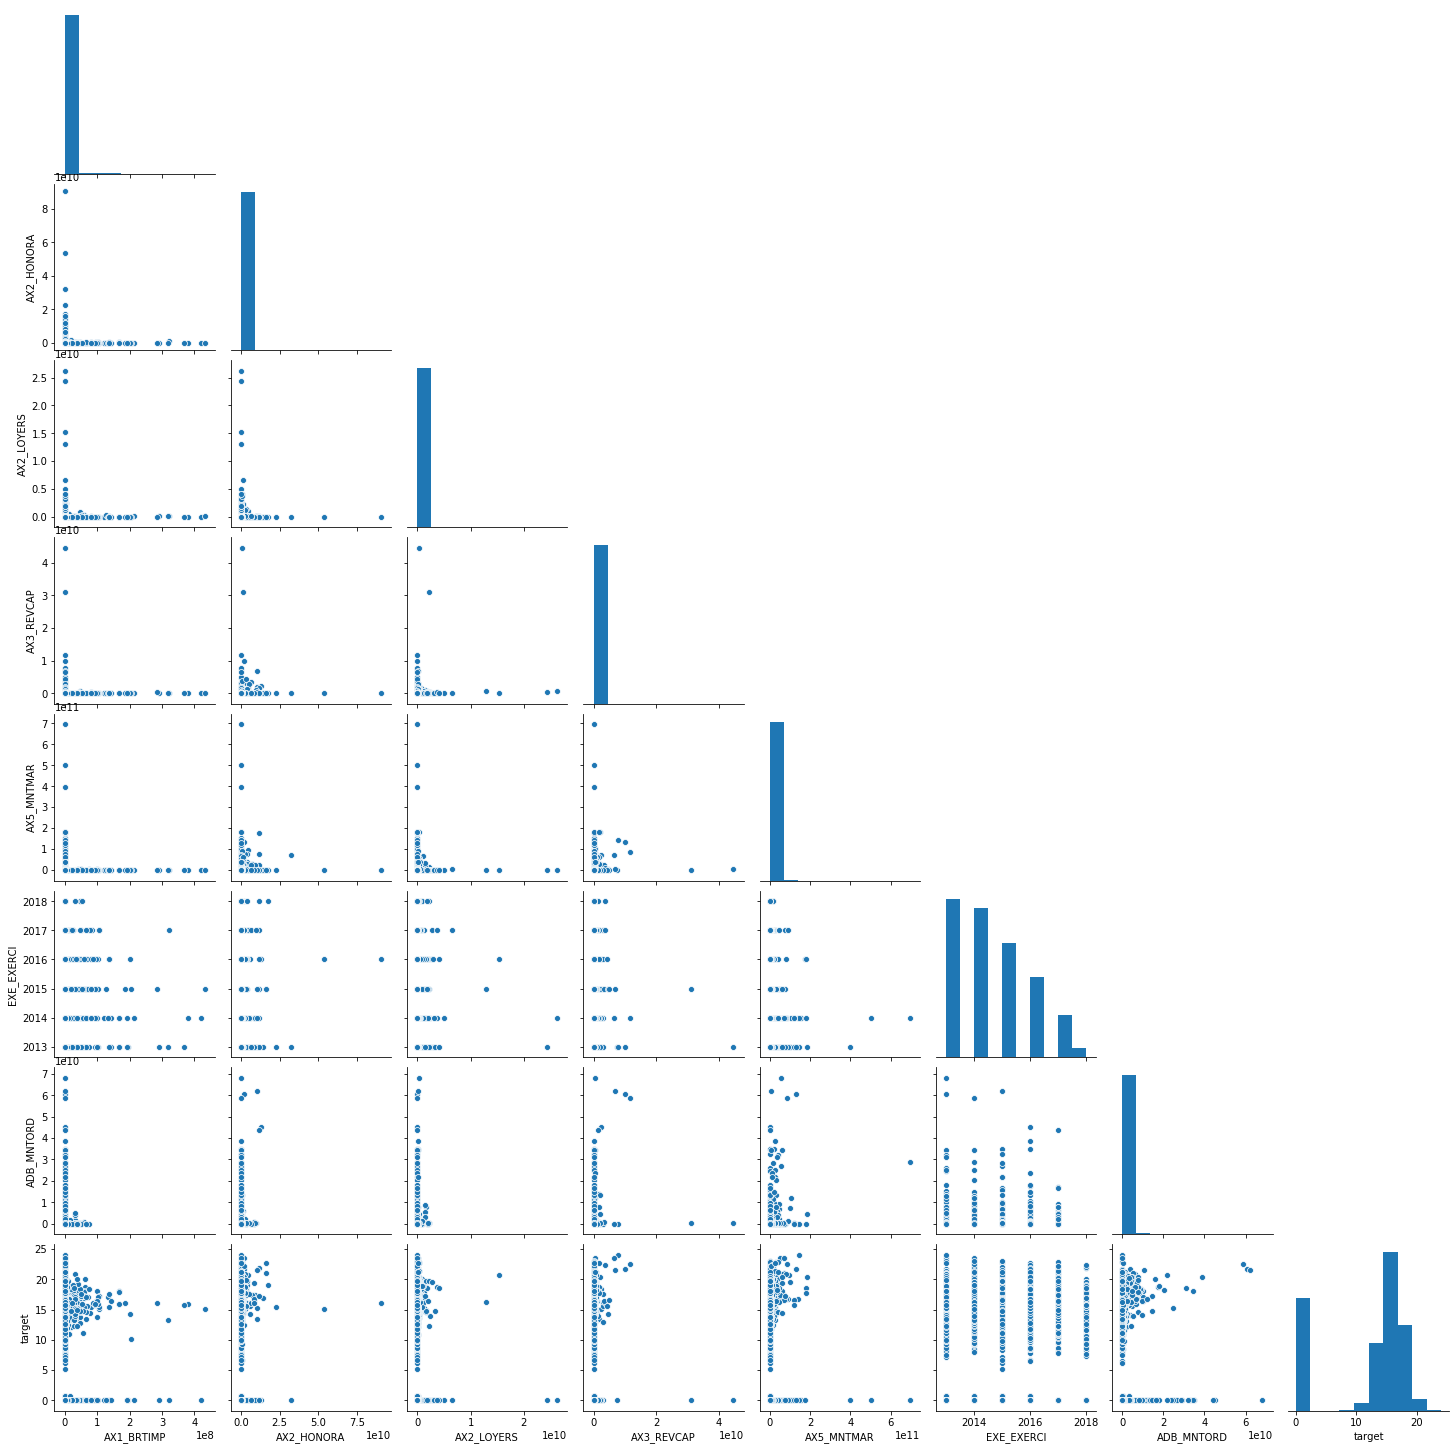

In [879]:
sns.pairplot(df_ax, corner = True)

<Figure size 432x288 with 0 Axes>

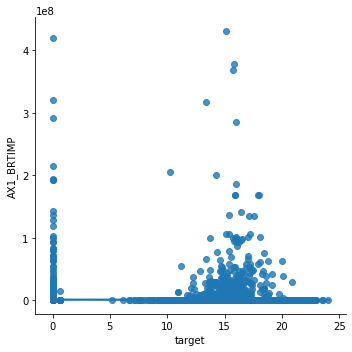

<Figure size 432x288 with 0 Axes>

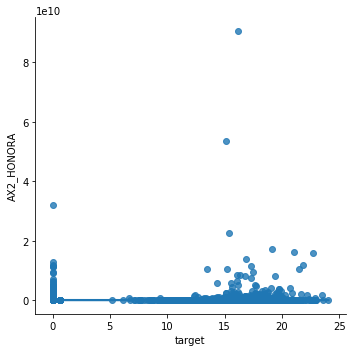

<Figure size 432x288 with 0 Axes>

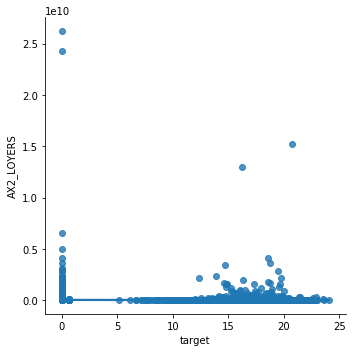

<Figure size 432x288 with 0 Axes>

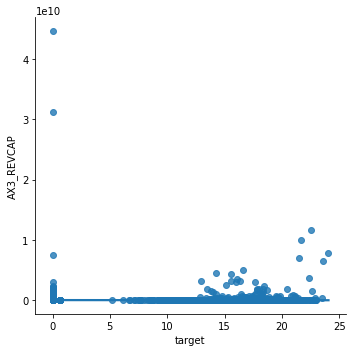

<Figure size 432x288 with 0 Axes>

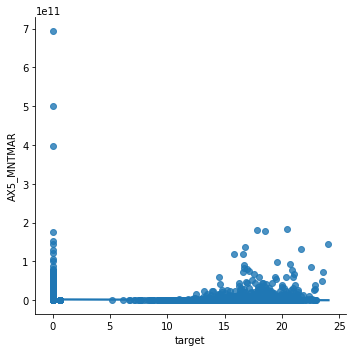

<Figure size 432x288 with 0 Axes>

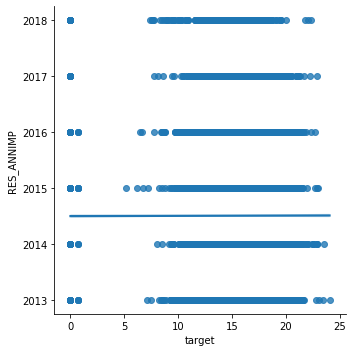

<Figure size 432x288 with 0 Axes>

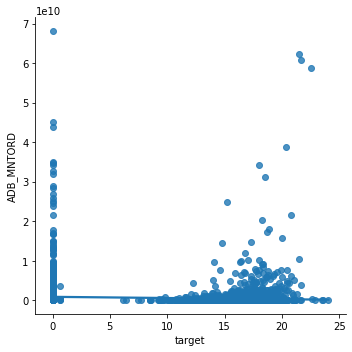

<Figure size 432x288 with 0 Axes>

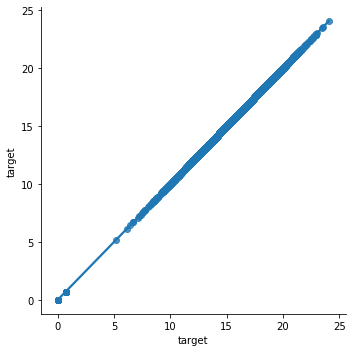

In [517]:
for col in df_ax:
    plt.figure()
    sns.lmplot(x='target', y= col, data=df_ax)

In [888]:
df_tva = df[['TVA_CHAFF6', 'TVA_CHAF12','TVA_CHAF18', 'TVA_CHAF22', 'TVA_TOTDUE', 'TVA_CRDINI', 'TVA_BASEQL','TVA_DEDEQL', 'TVA_BASEQI', 'TVA_DEDEQI', 'TVA_BASAUL', 'TVA_DEDAUL','TVA_BASAUI', 'TVA_DEDAUI', 'TVA_BASRSM', 'TVA_DEDRSM', 'TVA_DEDREG','TVA_RESTIT', 'TVA_MNTPAY', 'TVA_CRDFIN', 'TVA_CAFEXP', 'TVA_CAFSUS','TVA_CAFEXO', 'TVA_CRDRMC', 'TVA_MACHN', 'TVA_MCESQ', 'target']]

In [889]:
df_tva

,TVA_CHAFF6,TVA_CHAF12,TVA_CHAF18,TVA_CHAF22,TVA_TOTDUE,TVA_CRDINI,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_CRDFIN,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,target
0,0.0,52600000.0,6.125000e+05,0.0,6422250.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,13.575957
1,12000000.0,0.0,0.000000e+00,0.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,11.692894
2,0.0,31926026.0,0.000000e+00,0.0,3831117.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,31150.0,192751.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000e+00,0.0,0.0,45425.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1680387.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,16.237871
4,0.0,10999653.0,0.000000e+00,0.0,1319958.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,13.399983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.183079
25049,0.0,0.0,1.943510e+09,0.0,349831750.0,278182901.0,0.0,0.0,0.0,0.0,3.240247e+09,583246881.0,0.0,0.0,15982684.0,7991342.0,0.0,0.0,0.0,503679542.0,1.258497e+09,49339033.0,0.0,0.0,17404727.0,1303829.0,0.000000
25050,109424528.0,0.0,0.000000e+00,0.0,6565465.0,2766494.0,4676425.0,841756.0,0.0,0.0,9.816865e+06,1690411.0,0.0,0.0,0.0,0.0,0.0,0.0,1266808.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,15.320684
25051,0.0,107800000.0,0.000000e+00,0.0,12936000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12936000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,15.682378


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To con

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To con

<Figure size 1944x1080 with 0 Axes>

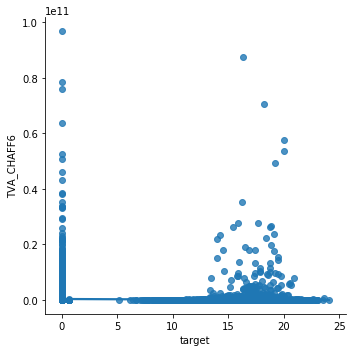

<Figure size 1944x1080 with 0 Axes>

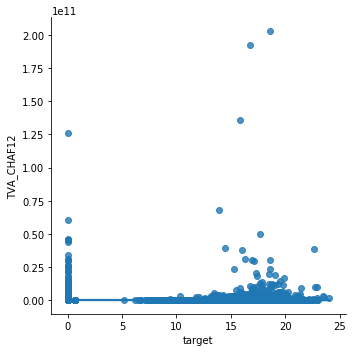

<Figure size 1944x1080 with 0 Axes>

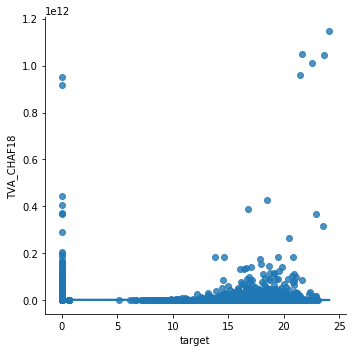

<Figure size 1944x1080 with 0 Axes>

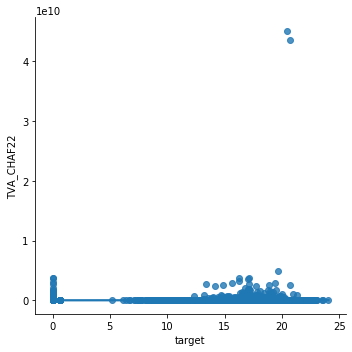

<Figure size 1944x1080 with 0 Axes>

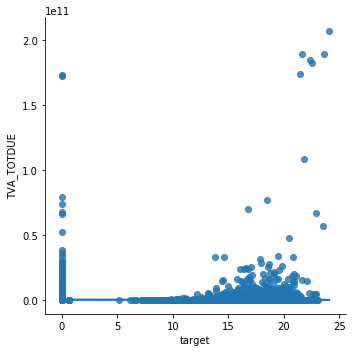

<Figure size 1944x1080 with 0 Axes>

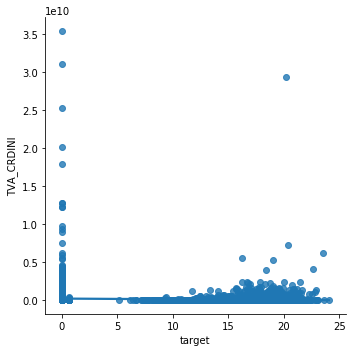

<Figure size 1944x1080 with 0 Axes>

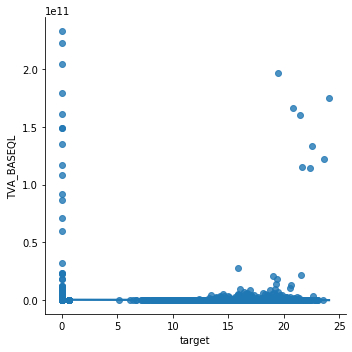

<Figure size 1944x1080 with 0 Axes>

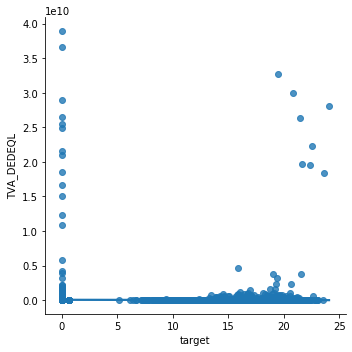

<Figure size 1944x1080 with 0 Axes>

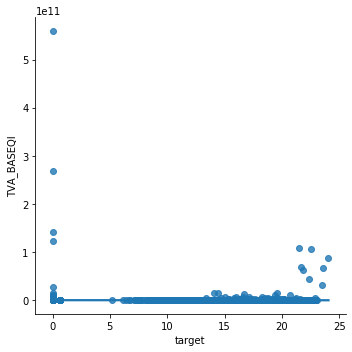

<Figure size 1944x1080 with 0 Axes>

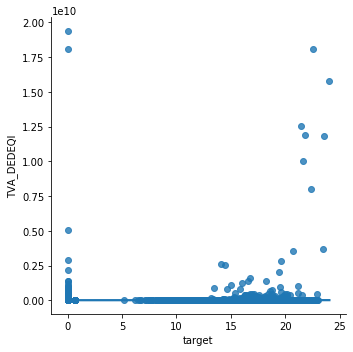

<Figure size 1944x1080 with 0 Axes>

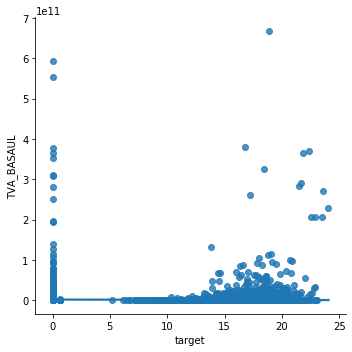

<Figure size 1944x1080 with 0 Axes>

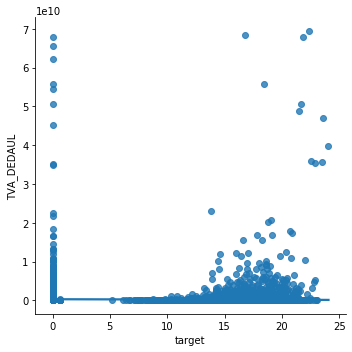

<Figure size 1944x1080 with 0 Axes>

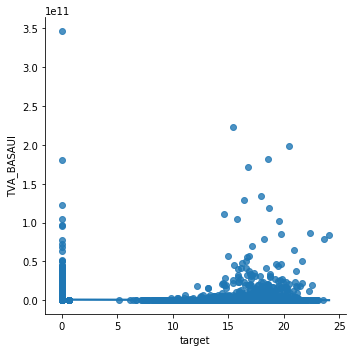

<Figure size 1944x1080 with 0 Axes>

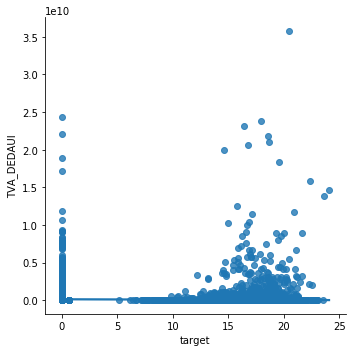

<Figure size 1944x1080 with 0 Axes>

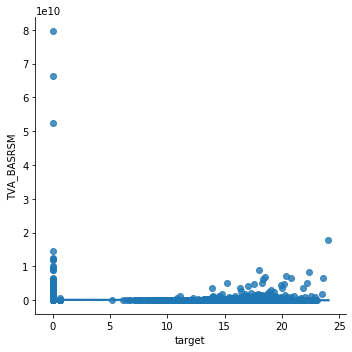

<Figure size 1944x1080 with 0 Axes>

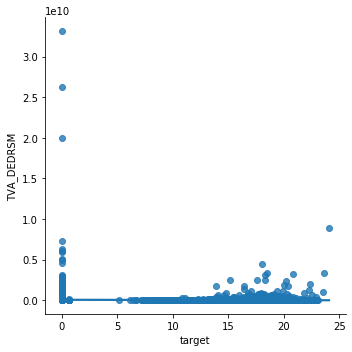

<Figure size 1944x1080 with 0 Axes>

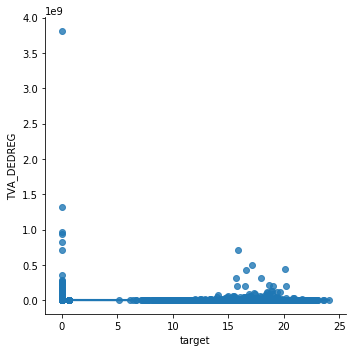

<Figure size 1944x1080 with 0 Axes>

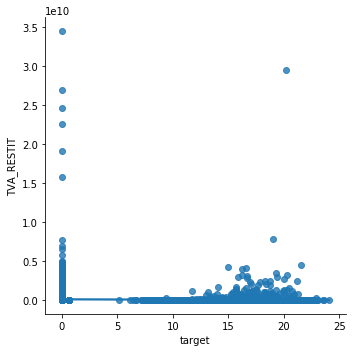

<Figure size 1944x1080 with 0 Axes>

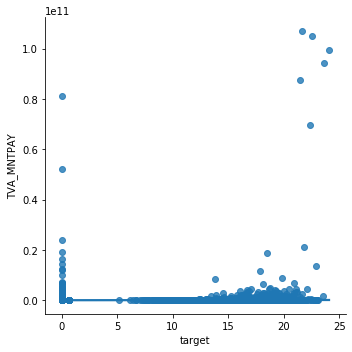

<Figure size 1944x1080 with 0 Axes>

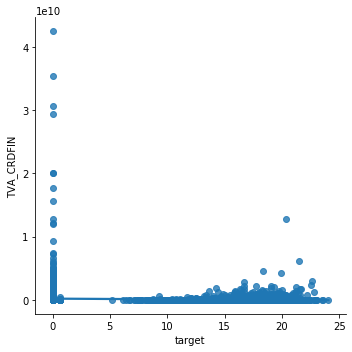

<Figure size 1944x1080 with 0 Axes>

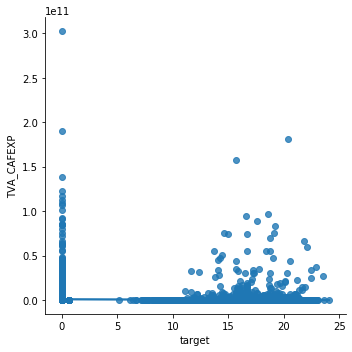

<Figure size 1944x1080 with 0 Axes>

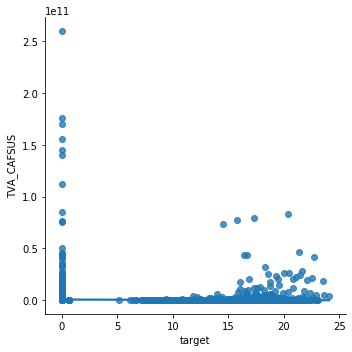

<Figure size 1944x1080 with 0 Axes>

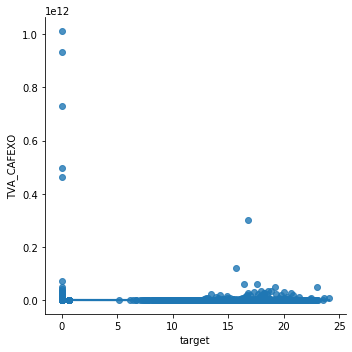

<Figure size 1944x1080 with 0 Axes>

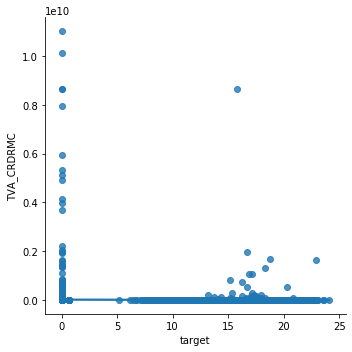

<Figure size 1944x1080 with 0 Axes>

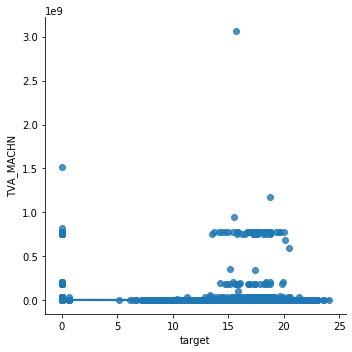

<Figure size 1944x1080 with 0 Axes>

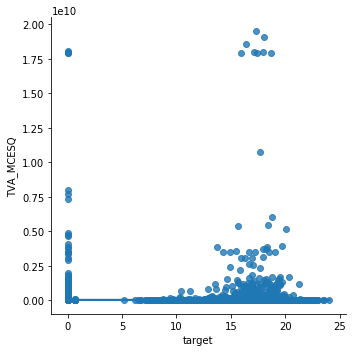

<Figure size 1944x1080 with 0 Axes>

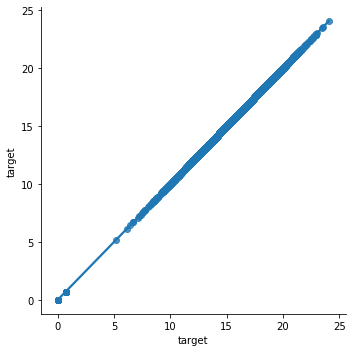

In [890]:
for col in df_tva:
    plt.figure()
    sns.lmplot(x='target', y= col, data=df_tva)

### 2) Pre-processing

In [894]:
df

,CTR_CATEGO_X,CTR_CESSAT,EXE_EXERCI,TVA_CHAFF6,TVA_CHAF12,TVA_CHAF18,TVA_CHAF22,TVA_TOTDUE,TVA_CRDINI,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_CRDFIN,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target
0,2,1,2013,0.0,52600000.0,6.125000e+05,0.0,6422250.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.000000e+00,13.575957
1,2,0,2013,12000000.0,0.0,0.000000e+00,0.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.000000e+00,11.692894
2,2,0,2015,0.0,31926026.0,0.000000e+00,0.0,3831117.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,31150.0,192751.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,0,0,2015,0.0,0.0,0.000000e+00,0.0,0.0,45425.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1680387.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.237871
4,2,0,2015,0.0,10999653.0,0.000000e+00,0.0,1319958.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21604529.0,0.0,0.0,0.000000e+00,13.399983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,1,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.355379e+08,16.183079
25049,0,0,2015,0.0,0.0,1.943510e+09,0.0,349831750.0,278182901.0,0.0,0.0,0.0,0.0,3.240247e+09,583246881.0,0.0,0.0,15982684.0,7991342.0,0.0,0.0,0.0,503679542.0,1.258497e+09,49339033.0,0.0,0.0,17404727.0,1303829.0,NaN,1.322304e+09,252630377.0,1965479.0,0.0,89303793.0,343899649.0,3857872.0,48566562.0,0.0,0.0,0.0,150000.0,150000.0,0.0,0.0,0.0,1416500.0,8656338.0,1.301083e+09,0.000000
25050,2,0,2013,109424528.0,0.0,0.000000e+00,0.0,6565465.0,2766494.0,4676425.0,841756.0,0.0,0.0,9.816865e+06,1690411.0,0.0,0.0,0.0,0.0,0.0,0.0,1266808.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4560000.0,0.0,419726.0,0.000000e+00,15.320684
25051,2,0,2013,0.0,107800000.0,0.000000e+00,0.0,12936000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12936000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120736000.0,0.0,0.0,0.000000e+00,15.682378


### encodage

In [896]:
code ={'M':0,'C':1,'P':2,'N':3}

In [897]:
df['CTR_CATEGO_X'] = df['CTR_CATEGO_X'].map(code)

In [898]:
df.dtypes.value_counts()

float64    48
int64       2
dtype: int64

### Modelisation

In [899]:
from sklearn.model_selection import train_test_split

In [900]:
trainset, testset =train_test_split(df_cl, test_size=0.2, random_state=0)

In [901]:
def imput(df):
    return df.dropna(axis=0)

In [902]:
def preprocessing(df):
    df = imput(df)
    
    X = df.drop(['target','id'], axis=1)
    y = df['target']
    
    return X, y

In [903]:
X_train, y_train = preprocessing(trainset)

In [904]:
X_test, y_test = preprocessing(testset)

In [905]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [906]:
mod = DecisionTreeRegressor(random_state=0)
mod_ran = RandomForestRegressor(random_state=0)
mod_regr = linear_model.LinearRegression()

### Evaluation

In [907]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [908]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print('Mean_squared_error: %.2f' %mean_squared_error(y_test, ypred))
    print('Coefficient of determination: %.2f' %r2_score(y_test, ypred))
    

### DecisionTres

In [909]:
evaluation(mod) #sans NAN

Mean_squared_error: 89.03
Coefficient of determination: -0.19


### RandomForest

In [910]:
evaluation(mod_ran)

Mean_squared_error: 40.88
Coefficient of determination: 0.45


### LinearRegression

In [911]:
evaluation(mod_regr)

Mean_squared_error: 84.02
Coefficient of determination: -0.13


### importants features avec "DecisionTree"

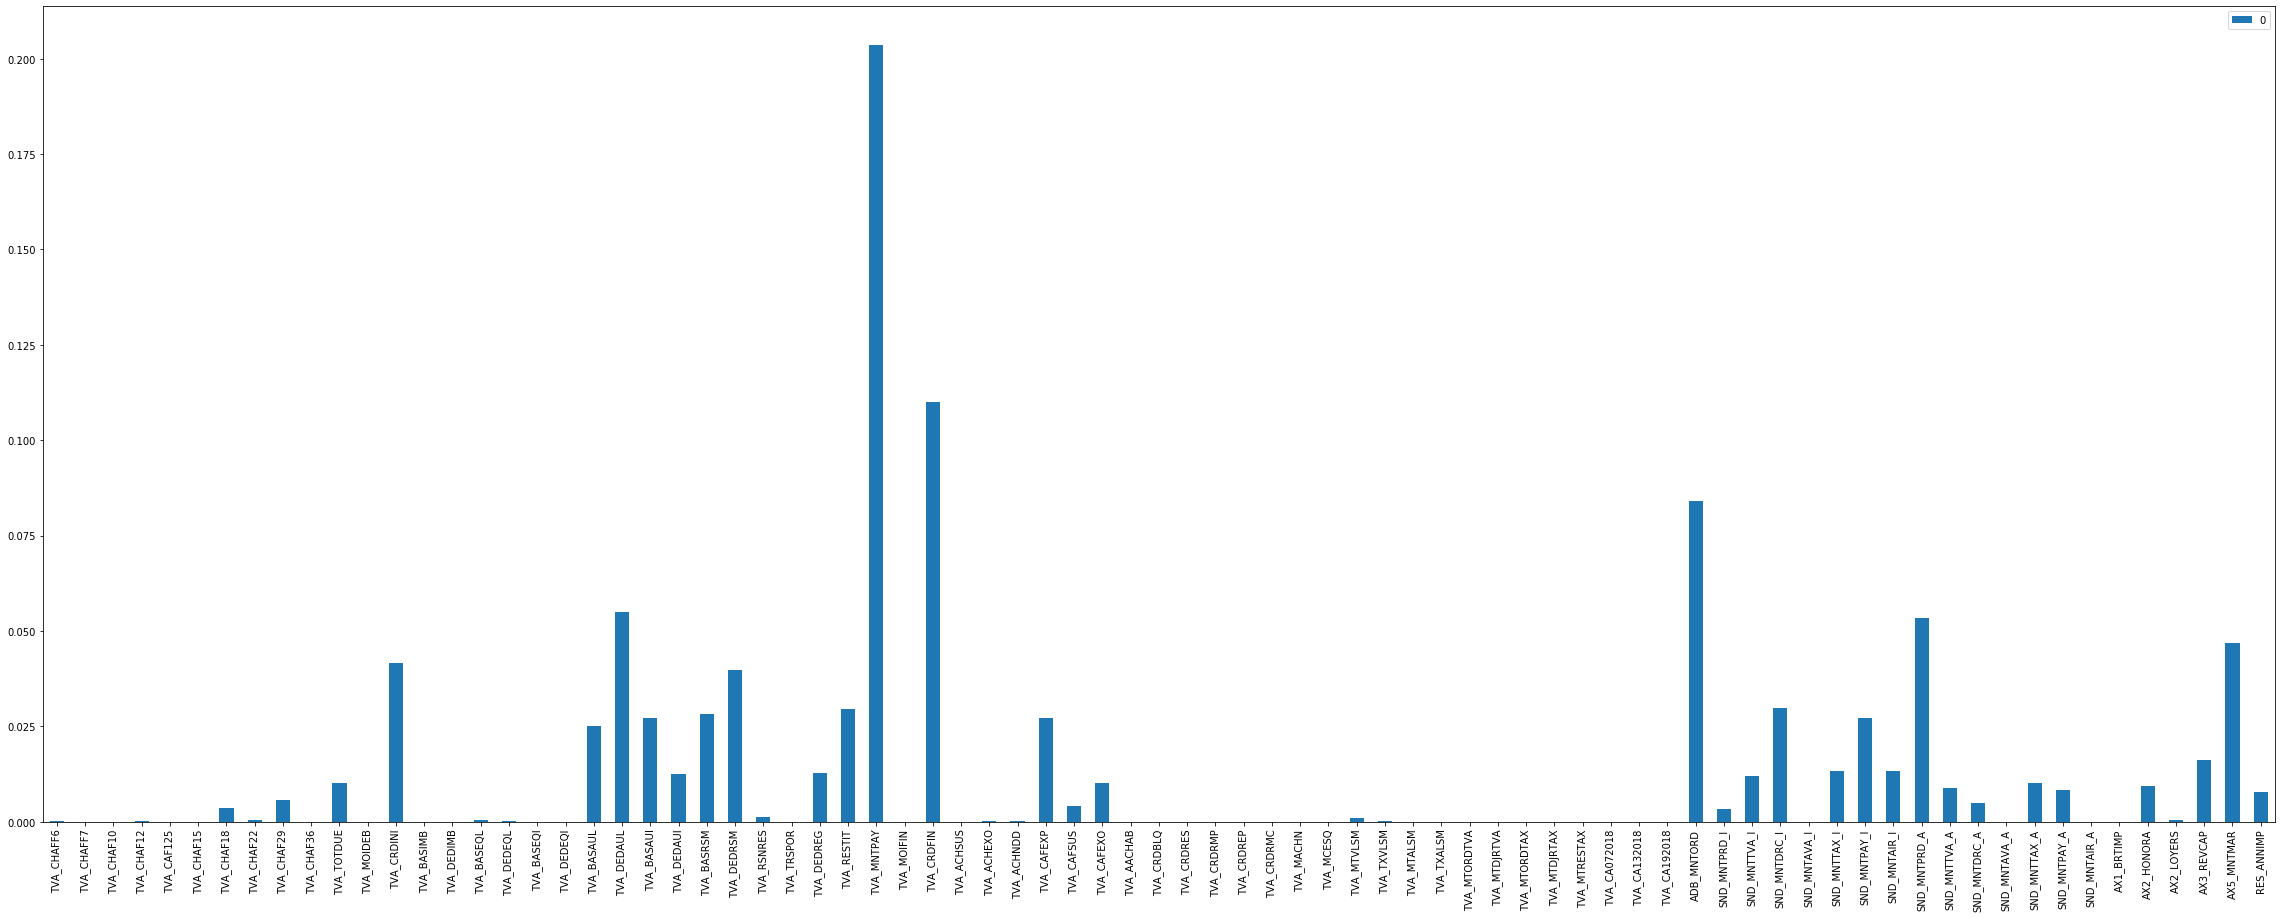

In [912]:
#plt.rcParams["figure.figsize"] = (27,15)
#plt.figure(figsize=(40,5))
pd.DataFrame(mod.feature_importances_,index= X_train.columns).plot.bar(figsize=(40,15))
plt.show()


### importants features avec "RandomForest"

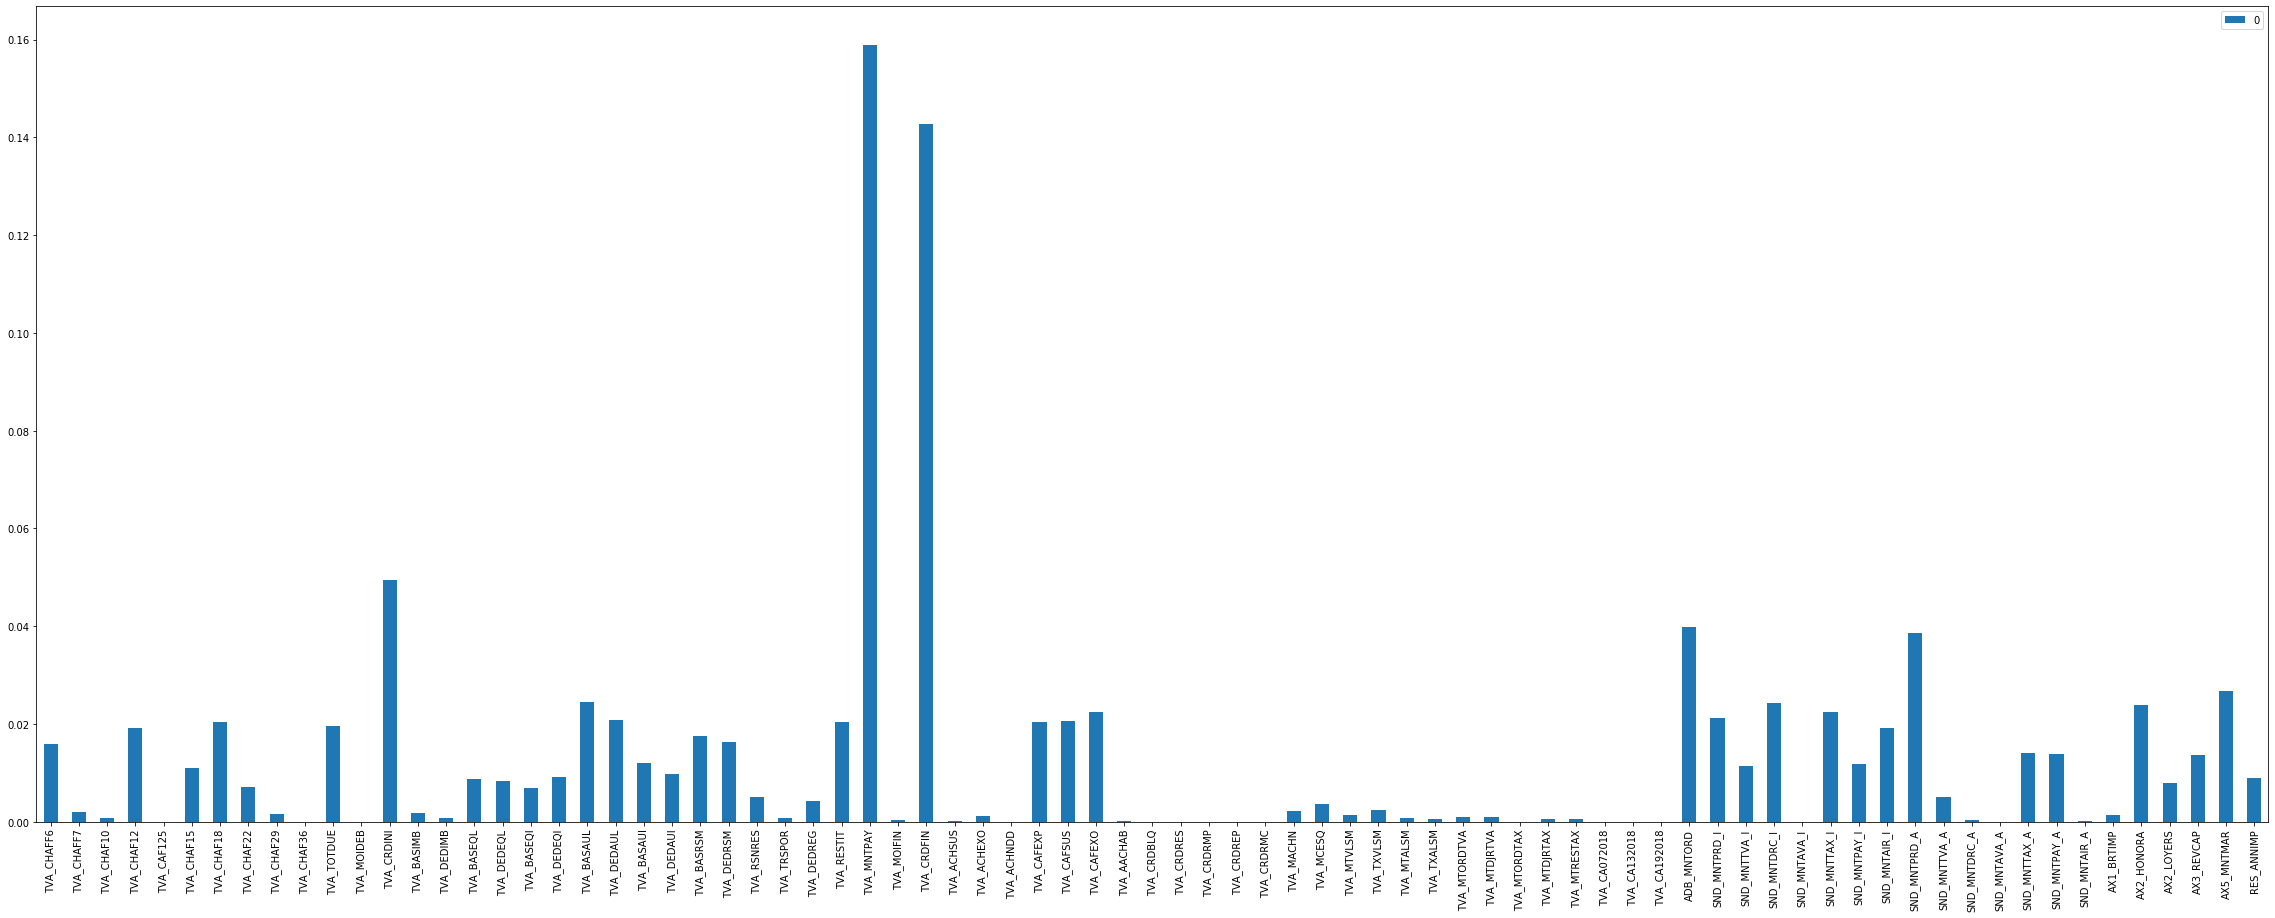

In [917]:
pd.DataFrame(mod_ran.feature_importances_,index= X_train.columns).plot.bar(figsize=(40,15))

### Pipeline 'SelectKBest'

In [913]:
model = make_pipeline(PolynomialFeatures(2), SelectKBest(f_regression, k=1), RandomForestRegressor(random_state=0))

In [914]:
evaluation(model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid val

Mean_squared_error: 73.17
Coefficient of determination: 0.02


In [915]:
model = make_pipeline(PolynomialFeatures(2), SelectKBest(f_regression, k=5), mod_regr)

In [916]:
evaluation(mod_regr)

Mean_squared_error: 84.02
Coefficient of determination: -0.13
